In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random
import time
from pathlib import Path

%matplotlib inline

print("Librerías importadas correctamente")

Librerías importadas correctamente


In [ ]:
import kagglehub

print("Descargando dataset Bird vs Drone...")
path = kagglehub.dataset_download("stealthknight/bird-vs-drone")
print(f"Dataset descargado en: {path}")


Descargando dataset Bird vs Drone...


100%|██████████| 1.05G/1.05G [00:08<00:00, 128MB/s] 

Extracting files...


Dataset descargado en: /root/.cache/kagglehub/datasets/stealthknight/bird-vs-drone/versions/1


# Exploración del Dataset

In [ ]:


def explore_dataset_structure(base_path):
    """
    Explora la estructura del dataset y separa imágenes de birds y drones
    """
    image_extensions = ('.jpg', '.jpeg', '.png')
    bird_images = []
    drone_images = []

    for root, dirs, files in os.walk(base_path):
        for file in files:
            if file.lower().endswith(image_extensions):
                file_path = os.path.join(root, file)
                # Clasificar basado en el nombre del archivo o carpeta
                if 'bird' in file.lower() or 'bt' in file.lower() or 'Bird' in root:
                    bird_images.append(file_path)
                elif 'drone' in file.lower() or 'dt' in file.lower() or 'Drone' in root:
                    drone_images.append(file_path)
                else:
                    # Si no está claro, asignar aleatoriamente
                    if random.random() > 0.5:
                        bird_images.append(file_path)
                    else:
                        drone_images.append(file_path)

    return bird_images, drone_images

# Cargar las rutas de las imágenes
print(" Explorando estructura del dataset...")
bird_images, drone_images = explore_dataset_structure(path)

print(f"\n{'='*60}")
print(f" DATASET BIRD vs DRONE")
print(f"{'='*60}")
print(f" Bird images encontradas: {len(bird_images)}")
print(f" Drone images encontradas: {len(drone_images)}")
print(f" Total de imágenes: {len(bird_images) + len(drone_images)}")
print(f"{'='*60}\n")

# Verificar que hay imágenes
if len(bird_images) == 0 or len(drone_images) == 0:
    print("  ADVERTENCIA: No se encontraron suficientes imágenes.")
    print(f"   Path explorado: {path}")
else:
    print(" Dataset cargado correctamente\n")

    # Mostrar ejemplos de rutas
    print(" Ejemplos de rutas:")
    print(f"   Bird: {bird_images[0]}")
    print(f"   Drone: {drone_images[0]}\n")

 Explorando estructura del dataset...

 DATASET BIRD vs DRONE
 Bird images encontradas: 8643
 Drone images encontradas: 12309
 Total de imágenes: 20952

 Dataset cargado correctamente

 Ejemplos de rutas:
   Bird: /root/.cache/kagglehub/datasets/stealthknight/bird-vs-drone/versions/1/Dataset/test/images/BT (88).jpg
   Drone: /root/.cache/kagglehub/datasets/stealthknight/bird-vs-drone/versions/1/Dataset/test/images/DT (154).jpg




🔍 ANÁLISIS EXPLORATORIO DEL DATASET

📊 Analizando 400 imágenes de muestra...

📐 DIMENSIONES DE LAS IMÁGENES
--------------------------------------------------------------------------------
   Dimensiones únicas encontradas: 1
   Dimensiones más comunes:
      640×640 píxeles: 400 imágenes (100.0%)

   Ancho - Min: 640px, Max: 640px, Media: 640px
   Alto  - Min: 640px, Max: 640px, Media: 640px
   Aspect Ratio promedio: 1.00

💾 TAMAÑO DE ARCHIVOS
--------------------------------------------------------------------------------
   Min: 8.8 KB
   Max: 100.5 KB
   Media: 44.0 KB
   Mediana: 38.4 KB

🎨 RANGO DE VALORES DE PÍXELES
--------------------------------------------------------------------------------
   Valor mínimo en dataset: 0
   Valor máximo en dataset: 255
   Rango teórico: [0, 255]
   Rango real utilizado: [0, 255]
   ✓ El dataset utiliza el rango completo [0, 255]

📊 ESTADÍSTICAS GLOBALES DE INTENSIDAD
--------------------------------------------------------------------------

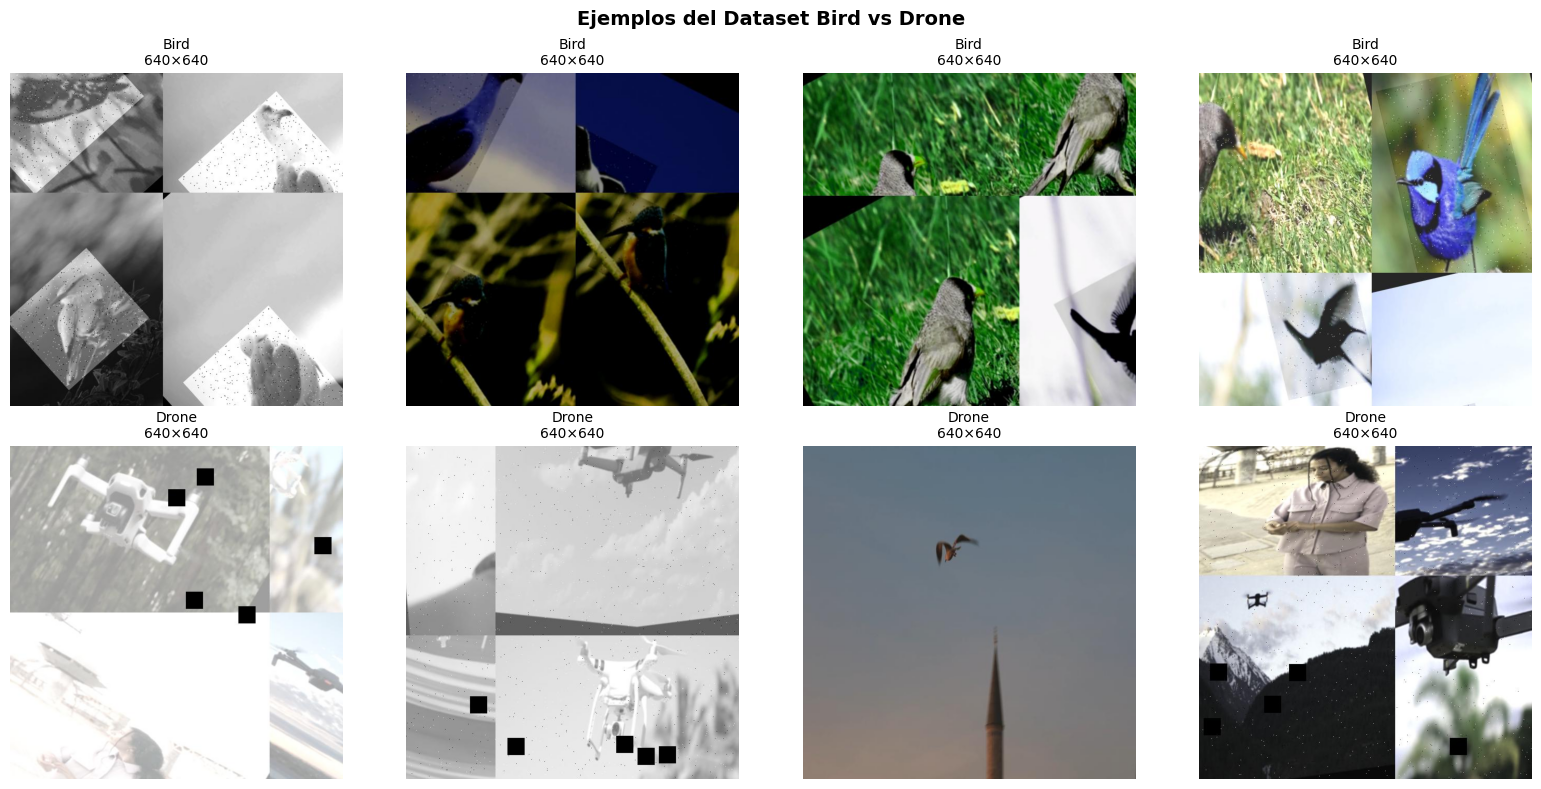

✓ Visualización guardada en 'dataset_samples.png'

🔬 COMPARACIÓN VISUAL DE ESTRATEGIAS DE PREPROCESAMIENTO



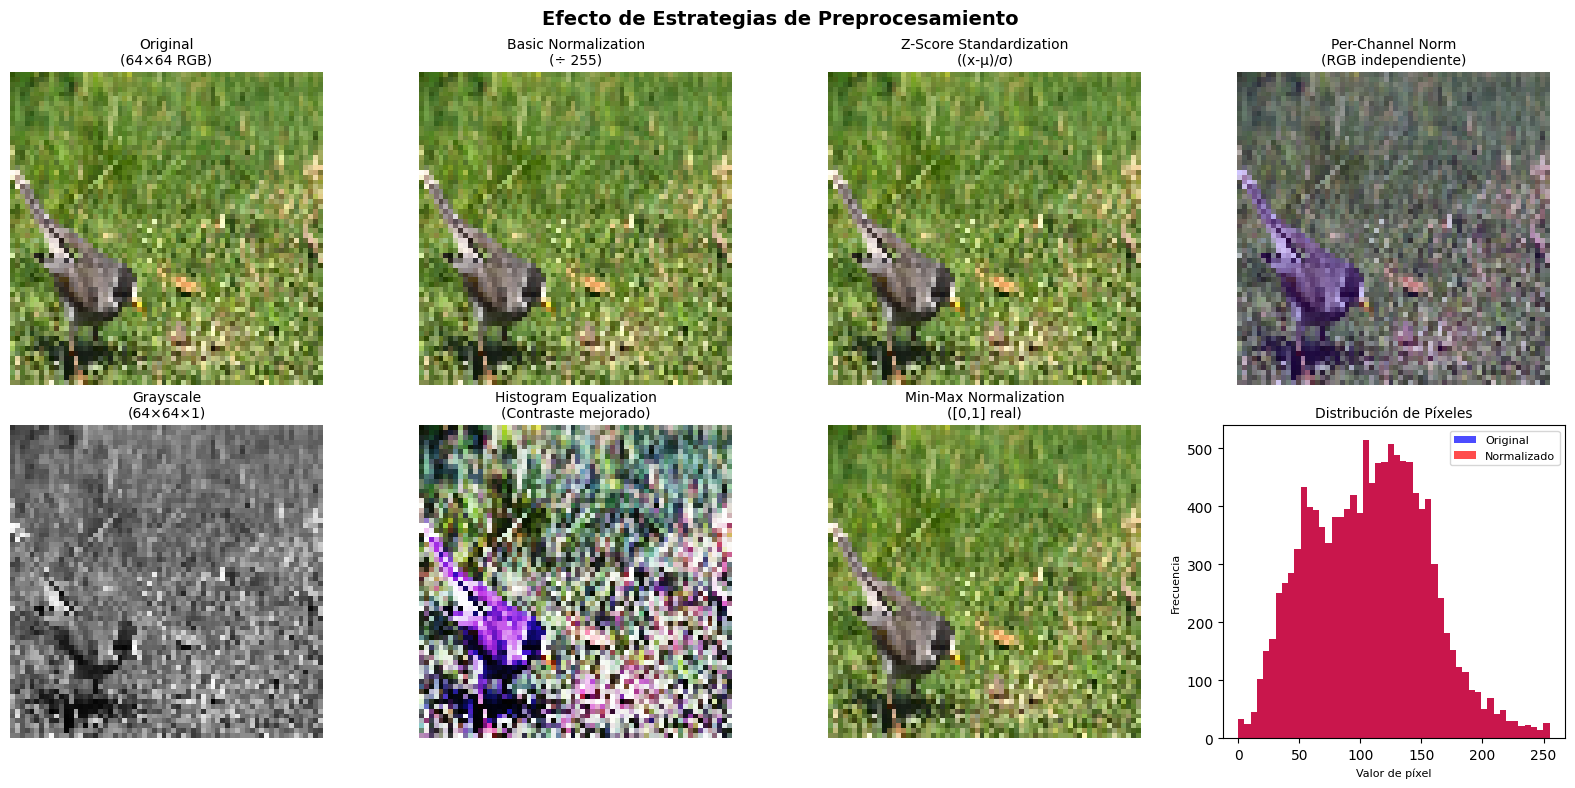

✓ Comparación guardada en 'preprocessing_effects.png'

✅ ANÁLISIS EXPLORATORIO COMPLETADO

Archivos generados:
  📊 dataset_samples.png - Ejemplos del dataset
  🔬 preprocessing_effects.png - Comparación de preprocesamiento



In [ ]:
# ============================================================================
# ANÁLISIS EXPLORATORIO DEL DATASET BIRD vs DRONE
# ============================================================================

import numpy as np
import matplotlib.pyplot as plt
import cv2
from collections import Counter

def analyze_dataset_characteristics(bird_images, drone_images, n_samples=100):
    """
    Analiza características del dataset: dimensiones, píxeles, colores
    """
    print("\n" + "="*80)
    print("🔍 ANÁLISIS EXPLORATORIO DEL DATASET")
    print("="*80 + "\n")

    # Listas para almacenar características
    all_images = bird_images[:n_samples] + drone_images[:n_samples]
    dimensions = []
    pixel_stats = {'min': [], 'max': [], 'mean': [], 'std': []}
    channel_stats = {'R': [], 'G': [], 'B': []}
    aspect_ratios = []
    file_sizes = []

    print(f"📊 Analizando {len(all_images)} imágenes de muestra...\n")

    for img_path in all_images:
        try:
            # Leer imagen
            img = cv2.imread(img_path)
            if img is None:
                continue

            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Dimensiones
            height, width, channels = img_rgb.shape
            dimensions.append((height, width))
            aspect_ratios.append(width / height)

            # Tamaño de archivo
            file_sizes.append(os.path.getsize(img_path) / 1024)  # KB

            # Estadísticas de píxeles
            pixel_stats['min'].append(img_rgb.min())
            pixel_stats['max'].append(img_rgb.max())
            pixel_stats['mean'].append(img_rgb.mean())
            pixel_stats['std'].append(img_rgb.std())

            # Estadísticas por canal
            channel_stats['R'].append(img_rgb[:,:,0].mean())
            channel_stats['G'].append(img_rgb[:,:,1].mean())
            channel_stats['B'].append(img_rgb[:,:,2].mean())

        except Exception as e:
            continue

    # ========================================================================
    # REPORTE DE CARACTERÍSTICAS
    # ========================================================================

    print("📐 DIMENSIONES DE LAS IMÁGENES")
    print("-" * 80)
    dim_counter = Counter(dimensions)
    print(f"   Dimensiones únicas encontradas: {len(dim_counter)}")
    print(f"   Dimensiones más comunes:")
    for dim, count in dim_counter.most_common(5):
        print(f"      {dim[0]}×{dim[1]} píxeles: {count} imágenes ({count/len(dimensions)*100:.1f}%)")

    widths = [d[1] for d in dimensions]
    heights = [d[0] for d in dimensions]
    print(f"\n   Ancho - Min: {min(widths)}px, Max: {max(widths)}px, Media: {np.mean(widths):.0f}px")
    print(f"   Alto  - Min: {min(heights)}px, Max: {max(heights)}px, Media: {np.mean(heights):.0f}px")
    print(f"   Aspect Ratio promedio: {np.mean(aspect_ratios):.2f}")

    print(f"\n💾 TAMAÑO DE ARCHIVOS")
    print("-" * 80)
    print(f"   Min: {min(file_sizes):.1f} KB")
    print(f"   Max: {max(file_sizes):.1f} KB")
    print(f"   Media: {np.mean(file_sizes):.1f} KB")
    print(f"   Mediana: {np.median(file_sizes):.1f} KB")

    print(f"\n🎨 RANGO DE VALORES DE PÍXELES")
    print("-" * 80)
    print(f"   Valor mínimo en dataset: {min(pixel_stats['min'])}")
    print(f"   Valor máximo en dataset: {max(pixel_stats['max'])}")
    print(f"   Rango teórico: [0, 255]")
    print(f"   Rango real utilizado: [{min(pixel_stats['min'])}, {max(pixel_stats['max'])}]")

    uses_full_range = (min(pixel_stats['min']) == 0 and max(pixel_stats['max']) == 255)
    if uses_full_range:
        print(f"   ✓ El dataset utiliza el rango completo [0, 255]")
    else:
        print(f"   ⚠ El dataset NO utiliza el rango completo (útil para Min-Max Normalization)")

    print(f"\n📊 ESTADÍSTICAS GLOBALES DE INTENSIDAD")
    print("-" * 80)
    print(f"   Media global de píxeles: {np.mean(pixel_stats['mean']):.2f}")
    print(f"   Desviación estándar global: {np.mean(pixel_stats['std']):.2f}")
    print(f"   → Estos valores se usan en Z-Score Standardization")

    print(f"\n🌈 DISTRIBUCIÓN POR CANAL RGB")
    print("-" * 80)
    print(f"   Canal Rojo   (R): Media = {np.mean(channel_stats['R']):.2f}, Std = {np.std(channel_stats['R']):.2f}")
    print(f"   Canal Verde  (G): Media = {np.mean(channel_stats['G']):.2f}, Std = {np.std(channel_stats['G']):.2f}")
    print(f"   Canal Azul   (B): Media = {np.mean(channel_stats['B']):.2f}, Std = {np.std(channel_stats['B']):.2f}")

    # Detectar desbalance de canales
    channel_means = [np.mean(channel_stats['R']), np.mean(channel_stats['G']), np.mean(channel_stats['B'])]
    channel_diff = max(channel_means) - min(channel_means)
    print(f"   Diferencia entre canales: {channel_diff:.2f}")

    if channel_diff > 20:
        print(f"   ⚠ Diferencia significativa entre canales (útil Per-Channel Normalization)")
    else:
        print(f"   ✓ Canales relativamente balanceados")

    print(f"\n🔄 NECESIDAD DE REDIMENSIONAMIENTO")
    print("-" * 80)
    if len(dim_counter) == 1:
        print(f"   ✓ Todas las imágenes tienen la misma dimensión: {list(dim_counter.keys())[0]}")
    else:
        print(f"   ⚠ Se requiere redimensionamiento: {len(dim_counter)} dimensiones diferentes")
        print(f"   → Todas las imágenes se redimensionarán a 64×64 para el modelo")

    print(f"\n📏 IMPACTO DEL REDIMENSIONAMIENTO A 64×64")
    print("-" * 80)
    print(f"   Dimensión objetivo: 64×64×3 = 12,288 features (RGB)")
    print(f"   Dimensión objetivo: 64×64×1 = 4,096 features (Grayscale)")
    print(f"   Reducción de features en Grayscale: {((12288-4096)/12288)*100:.1f}%")

    print("\n" + "="*80 + "\n")

    return {
        'dimensions': dimensions,
        'pixel_stats': pixel_stats,
        'channel_stats': channel_stats,
        'aspect_ratios': aspect_ratios,
        'file_sizes': file_sizes
    }


def visualize_sample_images(bird_images, drone_images, n_samples=4):
    """
    Visualiza imágenes de muestra del dataset
    """
    print("="*80)
    print("📸 VISUALIZACIÓN DE MUESTRAS DEL DATASET")
    print("="*80 + "\n")

    fig, axes = plt.subplots(2, n_samples, figsize=(16, 8))

    # Muestras de aves
    for i in range(n_samples):
        img_path = bird_images[np.random.randint(0, len(bird_images))]
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[0, i].imshow(img_rgb)
        axes[0, i].set_title(f'Bird\n{img_rgb.shape[0]}×{img_rgb.shape[1]}', fontsize=10)
        axes[0, i].axis('off')

    # Muestras de drones
    for i in range(n_samples):
        img_path = drone_images[np.random.randint(0, len(drone_images))]
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[1, i].imshow(img_rgb)
        axes[1, i].set_title(f'Drone\n{img_rgb.shape[0]}×{img_rgb.shape[1]}', fontsize=10)
        axes[1, i].axis('off')

    plt.suptitle('Ejemplos del Dataset Bird vs Drone', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig('dataset_samples.png', dpi=150, bbox_inches='tight')
    plt.show()

    print("✓ Visualización guardada en 'dataset_samples.png'\n")


def analyze_preprocessing_effects(bird_images, drone_images):
    """
    Muestra el efecto de diferentes estrategias de preprocesamiento en una imagen
    """
    print("="*80)
    print("🔬 COMPARACIÓN VISUAL DE ESTRATEGIAS DE PREPROCESAMIENTO")
    print("="*80 + "\n")

    # Tomar una imagen de muestra
    sample_img_path = bird_images[50]
    img = cv2.imread(sample_img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (64, 64))

    fig, axes = plt.subplots(2, 4, figsize=(16, 8))

    # 1. Original
    axes[0, 0].imshow(img_resized)
    axes[0, 0].set_title('Original\n(64×64 RGB)', fontsize=10)
    axes[0, 0].axis('off')

    # 2. Basic Normalization
    img_basic = img_resized / 255.0
    axes[0, 1].imshow(img_basic)
    axes[0, 1].set_title('Basic Normalization\n(÷ 255)', fontsize=10)
    axes[0, 1].axis('off')

    # 3. Z-Score Standardization
    img_flat = img_resized.reshape(-1).astype(np.float32)
    mean = np.mean(img_flat)
    std = np.std(img_flat)
    img_std = ((img_flat - mean) / std).reshape(64, 64, 3)
    # Normalizar para visualización
    img_std_vis = (img_std - img_std.min()) / (img_std.max() - img_std.min())
    axes[0, 2].imshow(img_std_vis)
    axes[0, 2].set_title('Z-Score Standardization\n((x-μ)/σ)', fontsize=10)
    axes[0, 2].axis('off')

    # 4. Per-Channel Normalization
    img_perchannel = img_resized.astype(np.float32).copy()
    for i in range(3):
        channel_mean = np.mean(img_perchannel[:,:,i])
        channel_std = np.std(img_perchannel[:,:,i])
        img_perchannel[:,:,i] = (img_perchannel[:,:,i] - channel_mean) / channel_std
    img_perchannel_vis = (img_perchannel - img_perchannel.min()) / (img_perchannel.max() - img_perchannel.min())
    axes[0, 3].imshow(img_perchannel_vis)
    axes[0, 3].set_title('Per-Channel Norm\n(RGB independiente)', fontsize=10)
    axes[0, 3].axis('off')

    # 5. Grayscale
    img_gray = cv2.cvtColor(img_resized, cv2.COLOR_RGB2GRAY)
    axes[1, 0].imshow(img_gray, cmap='gray')
    axes[1, 0].set_title('Grayscale\n(64×64×1)', fontsize=10)
    axes[1, 0].axis('off')

    # 6. Histogram Equalization
    img_eq = np.zeros_like(img_resized)
    for i in range(3):
        img_eq[:,:,i] = cv2.equalizeHist(img_resized[:,:,i])
    axes[1, 1].imshow(img_eq)
    axes[1, 1].set_title('Histogram Equalization\n(Contraste mejorado)', fontsize=10)
    axes[1, 1].axis('off')

    # 7. Min-Max Normalization
    img_minmax = (img_resized - img_resized.min()) / (img_resized.max() - img_resized.min())
    axes[1, 2].imshow(img_minmax)
    axes[1, 2].set_title('Min-Max Normalization\n([0,1] real)', fontsize=10)
    axes[1, 2].axis('off')

    # 8. Histograma de píxeles
    axes[1, 3].hist(img_resized.ravel(), bins=50, alpha=0.7, color='blue', label='Original')
    axes[1, 3].hist((img_basic*255).ravel(), bins=50, alpha=0.7, color='red', label='Normalizado')
    axes[1, 3].set_title('Distribución de Píxeles', fontsize=10)
    axes[1, 3].legend(fontsize=8)
    axes[1, 3].set_xlabel('Valor de píxel', fontsize=8)
    axes[1, 3].set_ylabel('Frecuencia', fontsize=8)

    plt.suptitle('Efecto de Estrategias de Preprocesamiento', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig('preprocessing_effects.png', dpi=150, bbox_inches='tight')
    plt.show()

    print("✓ Comparación guardada en 'preprocessing_effects.png'\n")


# ============================================================================
# EJECUTAR ANÁLISIS COMPLETO
# ============================================================================

# Analizar características del dataset
dataset_stats = analyze_dataset_characteristics(bird_images, drone_images, n_samples=200)

# Visualizar muestras
visualize_sample_images(bird_images, drone_images, n_samples=4)

# Mostrar efectos de preprocesamiento
analyze_preprocessing_effects(bird_images, drone_images)

print("="*80)
print("✅ ANÁLISIS EXPLORATORIO COMPLETADO")
print("="*80)
print("\nArchivos generados:")
print("  📊 dataset_samples.png - Ejemplos del dataset")
print("  🔬 preprocessing_effects.png - Comparación de preprocesamiento\n")

# Definicion Manual del Modelo

In [ ]:


def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1 / (1 + np.exp(-z))
    return s


def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.

    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)

    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros(shape=(dim, 1))
    b = 0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))

    return w, b


def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    """

    m = X.shape[1]

    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T, X) + b)  # compute activation
    cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))  # compute cost

    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())

    grads = {"dw": dw,
             "db": db}

    return grads, cost


def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    """
    This function optimizes w and b by running a gradient descent algorithm

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps

    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    """

    costs = []

    for i in range(num_iterations):

        # Cost and gradient calculation
        grads, cost = propagate(w, b, X, Y)

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # update rule
        w = w - learning_rate * dw
        b = b - learning_rate * db

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)

        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f" % (i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs


def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)

    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''

    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)

    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = sigmoid(np.dot(w.T, X) + b)

    for i in range(A.shape[1]):
        # Convert probabilities a[0,i] to actual predictions p[0,i]
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0

    assert(Y_prediction.shape == (1, m))

    return Y_prediction


def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the logistic regression model by calling the function you've implemented previously

    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations

    Returns:
    d -- dictionary containing information about the model.
    """

    # initialize parameters with zeros
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]

    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train": Y_prediction_train,
         "w": w,
         "b": b,
         "learning_rate": learning_rate,
         "num_iterations": num_iterations}

    return d

# Estrategias de Preprocesamiento de los Datos

## Preprocess_standardization

In [ ]:
def preprocess_standardization(image_paths, target_size=(64, 64), label=0, max_images=300,
                                mean=None, std=None):
    """
    Estandarización (Z-score normalization): (x - mean) / std
    - Centra los datos en 0 con desviación estándar de 1
    - Mejor práctica en muchos modelos ML tradicionales
    """
    images = []
    labels = []

    for img_path in image_paths[:max_images]:
        try:
            img = cv2.imread(img_path)
            if img is None:
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, target_size)
            img_flat = img.reshape(-1).astype(np.float32)
            images.append(img_flat)
            labels.append(label)
        except:
            continue

    images = np.array(images).T

    # Calcular o usar media y std proporcionados
    if mean is None:
        mean = np.mean(images, axis=1, keepdims=True)
    if std is None:
        std = np.std(images, axis=1, keepdims=True)
        std[std == 0] = 1  # Evitar división por cero

    images_standardized = (images - mean) / std
    labels = np.array(labels).reshape(1, -1)

    return images_standardized, labels, mean, std

## preprocess_min_max_normalization

La normalización Min-Max escala linealmente los valores al rango [0, 1] mediante la fórmula x' = (x - x_min) / (x_max - x_min), donde x_min y x_max representan los valores mínimo y máximo observados en el dataset completo. A diferencia de la normalización básica que asume un rango teórico fijo [0, 255] (valores típicos de intensidad de píxeles), este método utiliza los valores reales presentes en los datos, adaptándose a la distribución específica del dataset. Esta técnica preserva las relaciones exactas entre valores originales mientras garantiza que todas las características (atributos medibles extraídos de las imágenes) contribuyan proporcionalmente al modelo. Es ventajosa cuando los datos no utilizan todo el espectro teórico posible (por ejemplo, imágenes que solo usan valores entre 50 y 200) o cuando se requiere una transformación que mantenga la estructura de distancias relativas entre puntos (preservando similitudes entre imágenes).

In [ ]:

def preprocess_min_max_normalization(image_paths, target_size=(64, 64), label=0, max_images=300,
                                      global_min=None, global_max=None):
    """
    Normalización Min-Max: (x - min) / (max - min)
    - Escala valores al rango [0, 1]
    """
    images = []
    labels = []

    for img_path in image_paths[:max_images]:
        try:
            img = cv2.imread(img_path)
            if img is None:
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, target_size)
            img_flat = img.reshape(-1).astype(np.float32)
            images.append(img_flat)
            labels.append(label)
        except:
            continue

    images = np.array(images).T

    if global_min is None:
        global_min = np.min(images)
    if global_max is None:
        global_max = np.max(images)

    images_normalized = (images - global_min) / (global_max - global_min + 1e-8)
    labels = np.array(labels).reshape(1, -1)

    return images_normalized, labels, global_min, global_max

## Preprocess_per_image_normalization

La normalización por imagen individual aplica estandarización Z-score de manera independiente a cada muestra (fotografía individual del dataset), calculando su propia media (promedio de intensidades de píxeles) y desviación estándar específicas. Matemáticamente, para cada imagen i: x'_i = (x_i - μ_i) / σ_i. Esta estrategia elimina variaciones locales de iluminación (cantidad de luz en la escena), exposición (tiempo que el sensor de la cámara captura luz) y contraste (diferencia entre zonas claras y oscuras) que son específicas de cada fotografía, permitiendo que el modelo se enfoque en características estructurales (formas, bordes, texturas) independientes de condiciones de captura. Es particularmente efectiva cuando el dataset presenta alta heterogeneidad (gran variedad) en condiciones de adquisición (momentos y lugares donde se tomaron las fotos). Sin embargo, descarta información potencialmente discriminativa (útil para distinguir entre clases) sobre brillo relativo entre muestras, lo cual puede ser problemático si esas características globales son relevantes para la clasificación.

In [ ]:

def preprocess_per_image_normalization(image_paths, target_size=(64, 64), label=0, max_images=300):
    """
    Normalización por imagen individual
    - Cada imagen se normaliza independientemente
    - Útil cuando hay variaciones de iluminación entre imágenes
    """
    images = []
    labels = []

    for img_path in image_paths[:max_images]:
        try:
            img = cv2.imread(img_path)
            if img is None:
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, target_size)
            img_flat = img.reshape(-1).astype(np.float32)

            # Normalizar cada imagen individualmente
            img_mean = np.mean(img_flat)
            img_std = np.std(img_flat)
            if img_std > 0:
                img_normalized = (img_flat - img_mean) / img_std
            else:
                img_normalized = img_flat - img_mean

            images.append(img_normalized)
            labels.append(label)
        except:
            continue

    return np.array(images).T, np.array(labels).reshape(1, -1)

## Preprocess_per_channel_normalization

La normalización por canal procesa independientemente cada componente de color (Rojo, Verde, Azul), calculando media y desviación estándar específicas para cada canal en todo el dataset. Matemáticamente, para el canal c: x'_c = (x_c - μ_c) / σ_c. Este método reconoce que los tres canales RGB (tres matrices numéricas que representan intensidades de rojo, verde y azul en cada píxel) pueden tener distribuciones estadísticas diferentes debido a propiedades físicas de cámaras (sensores con sensibilidades diferentes por color), iluminación (fuentes de luz con dominancias cromáticas específicas) o características intrínsecas de los objetos fotografiados. Al normalizar cada canal independientemente, se equilibra su contribución relativa al aprendizaje del modelo. Esta técnica es estándar en transfer learning (reutilización de modelos pre-entrenados) con redes pre-entrenadas en ImageNet (gran base de datos de millones de imágenes clasificadas) y es especialmente útil cuando diferentes canales de color contienen información discriminativa en escalas diferentes.

In [ ]:



def preprocess_per_channel_normalization(image_paths, target_size=(64, 64), label=0, max_images=300,
                                          channel_means=None, channel_stds=None):
    """
    Normalización por canal RGB separado
    - Normaliza cada canal de color independientemente
    - Común en modelos pre-entrenados (ImageNet stats)
    """
    images = []
    labels = []
    temp_images = []

    for img_path in image_paths[:max_images]:
        try:
            img = cv2.imread(img_path)
            if img is None:
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, target_size)
            temp_images.append(img)
            labels.append(label)
        except:
            continue

    temp_images = np.array(temp_images).astype(np.float32)

    # Calcular estadísticas por canal si no se proporcionan
    if channel_means is None:
        channel_means = np.mean(temp_images, axis=(0, 1, 2))
    if channel_stds is None:
        channel_stds = np.std(temp_images, axis=(0, 1, 2))
        channel_stds[channel_stds == 0] = 1

    # Normalizar cada canal
    for i in range(3):
        temp_images[:, :, :, i] = (temp_images[:, :, :, i] - channel_means[i]) / channel_stds[i]

    # Aplanar
    images = [img.reshape(-1) for img in temp_images]
    images = np.array(images).T
    labels = np.array(labels).reshape(1, -1)

    return images, labels, channel_means, channel_stds

## Preprocess_grayscale

La conversión a escala de grises transforma imágenes RGB de tres canales (rojo, verde, azul) en representaciones monocromáticas (blanco y negro) de un solo canal, reduciendo la dimensionalidad de entrada (número de valores numéricos que representan cada imagen).

 Esta transformación pondera (asigna diferentes importancias a) los canales RGB según la percepción luminosa del ojo humano (sensibilidad diferente a cada color), típicamente usando la fórmula Gray = 0.299R + 0.587G + 0.114B, seguida de normalización. La principal ventaja es la reducción significativa del costo computacional (memoria RAM y tiempo de procesamiento) y la disminución del riesgo de overfitting (memorización excesiva de datos de entrenamiento sin generalizar) al tener menos parámetros que aprender (menos valores numéricos ajustables en el modelo). Es efectiva cuando las características morfológicas (formas, siluetas), de textura (patrones de superficie) y de forma son más discriminativas que la información cromática (colores), y cuando el color no aporta valor predictivo significativo al problema de clasificación.

In [ ]:


def preprocess_grayscale(image_paths, target_size=(64, 64), label=0, max_images=300, normalize=True):
    """
    Conversión a escala de grises + normalización
    - Reduce dimensionalidad (1 canal en vez de 3)
    - Útil cuando el color no es crítico
    """
    images = []
    labels = []

    for img_path in image_paths[:max_images]:
        try:
            img = cv2.imread(img_path)
            if img is None:
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convertir a gris
            img = cv2.resize(img, target_size)
            img_flat = img.reshape(-1).astype(np.float32)

            if normalize:
                img_flat = img_flat / 255.0

            images.append(img_flat)
            labels.append(label)
        except:
            continue

    return np.array(images).T, np.array(labels).reshape(1, -1)



## Preprocess_histogram_equalization

La ecualización de histograma es una técnica de procesamiento de imágenes que redistribuye las intensidades de píxeles (valores numéricos de brillo en cada punto) para maximizar el contraste (diferencia visual entre zonas claras y oscuras), transformando el histograma original (gráfico que muestra la frecuencia de cada nivel de intensidad) en una distribución aproximadamente uniforme (todos los niveles de brillo aparecen con frecuencia similar). El proceso mapea (transforma) los valores de píxeles usando la función de distribución acumulativa o CDF (suma progresiva de frecuencias del histograma original). Cuando se aplica a imágenes RGB, se procesa independientemente cada canal de color. Esta técnica acentúa bordes (límites entre regiones de diferente intensidad) y detalles estructurales al expandir el rango de intensidades utilizadas, siendo particularmente valiosa para imágenes con bajo contraste (diferencias pequeñas entre zonas claras y oscuras) o pobre distribución de tonos (uso limitado del rango de intensidades disponible). Sin embargo, puede amplificar ruido (variaciones aleatorias indeseadas) en regiones homogéneas (zonas uniformes) y modificar las relaciones originales de intensidad entre diferentes regiones de la imagen.

In [ ]:



def preprocess_histogram_equalization(image_paths, target_size=(64, 64), label=0, max_images=300):
    """
    Ecualización de histograma + normalización
    - Mejora el contraste de la imagen
    - Útil para imágenes con poca iluminación
    """
    images = []
    labels = []

    for img_path in image_paths[:max_images]:
        try:
            img = cv2.imread(img_path)
            if img is None:
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, target_size)

            # Ecualizar histograma en cada canal
            img_eq = np.zeros_like(img)
            for i in range(3):
                img_eq[:, :, i] = cv2.equalizeHist(img[:, :, i])

            img_flat = img_eq.reshape(-1) / 255.0
            images.append(img_flat)
            labels.append(label)
        except:
            continue

    return np.array(images).T, np.array(labels).reshape(1, -1)


## Preprocess_basic_normalization

La normalización básica es la técnica más simple y común en deep learning (aprendizaje profundo automático), consistente en escalar los valores de píxeles (puntos individuales que componen una imagen digital) dividiendo cada valor por 255, transformando así el rango original [0, 255] al intervalo [0, 1]. Matemáticamente se expresa como x' = x / 255. Este método facilita la convergencia (proceso de alcanzar la solución óptima) del algoritmo de gradient descent (descenso de gradiente, método iterativo para encontrar mínimos) al trabajar con valores pequeños y homogéneos, evitando problemas numéricos causados por grandes magnitudes. Es especialmente efectiva en redes neuronales convolucionales (modelos que aprenden patrones visuales automáticamente) donde las imágenes utilizan el rango completo de intensidades RGB (brillo de los componentes rojo, verde y azul), permitiendo que el modelo aprenda más rápidamente sin requerir cálculos complejos de estadísticas del dataset (conjunto de datos).

In [ ]:
def preprocess_basic_normalization(image_paths, target_size=(64, 64), label=0, max_images=300):
    """
    Preprocesamiento básico: Normalización simple dividiendo por 255
    - Más común en CNNs
    - Escala valores a [0, 1]
    """
    images = []
    labels = []

    for img_path in image_paths[:max_images]:
        try:
            img = cv2.imread(img_path)
            if img is None:
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, target_size)
            img_flat = img.reshape(-1) / 255.0  # Normalización básica
            images.append(img_flat)
            labels.append(label)
        except:
            continue

    return np.array(images).T, np.array(labels).reshape(1, -1)


## Función: load_dataset_with_preprocessing

In [ ]:

def load_dataset_with_preprocessing(bird_images, drone_images,
                                    preprocessing_method='basic',
                                    target_size=(64, 64),
                                    max_images_per_class=150,
                                    train_split=0.8):
    """
    Función unificada para cargar dataset con diferentes métodos de preprocesamiento

    Args:
        bird_images: Lista de rutas de imágenes de pájaros
        drone_images: Lista de rutas de imágenes de drones
        preprocessing_method: 'basic', 'standardization', 'minmax', 'per_image',
                             'per_channel', 'grayscale', 'histogram'
        target_size: Tamaño objetivo de las imágenes
        max_images_per_class: Máximo de imágenes por clase
        train_split: Proporción para conjunto de entrenamiento

    Returns:
        X_train, Y_train, X_test, Y_test, preprocessing_stats
    """

    preprocessing_stats = {}

    # Seleccionar método de preprocesamiento
    if preprocessing_method == 'basic':
        X_bird, Y_bird = preprocess_basic_normalization(
            bird_images, target_size, label=0, max_images=max_images_per_class)
        X_drone, Y_drone = preprocess_basic_normalization(
            drone_images, target_size, label=1, max_images=max_images_per_class)
        preprocessing_stats['method'] = 'Basic Normalization (/ 255)'

    elif preprocessing_method == 'standardization':
        X_bird, Y_bird, mean_bird, std_bird = preprocess_standardization(
            bird_images, target_size, label=0, max_images=max_images_per_class)
        X_drone, Y_drone, mean_drone, std_drone = preprocess_standardization(
            drone_images, target_size, label=1, max_images=max_images_per_class)
        preprocessing_stats['method'] = 'Z-Score Standardization'
        preprocessing_stats['mean'] = (mean_bird + mean_drone) / 2
        preprocessing_stats['std'] = (std_bird + std_drone) / 2

    elif preprocessing_method == 'minmax':
        X_bird, Y_bird, min_b, max_b = preprocess_min_max_normalization(
            bird_images, target_size, label=0, max_images=max_images_per_class)
        X_drone, Y_drone, min_d, max_d = preprocess_min_max_normalization(
            drone_images, target_size, label=1, max_images=max_images_per_class)
        preprocessing_stats['method'] = 'Min-Max Normalization'
        preprocessing_stats['global_min'] = min(min_b, min_d)
        preprocessing_stats['global_max'] = max(max_b, max_d)

    elif preprocessing_method == 'per_image':
        X_bird, Y_bird = preprocess_per_image_normalization(
            bird_images, target_size, label=0, max_images=max_images_per_class)
        X_drone, Y_drone = preprocess_per_image_normalization(
            drone_images, target_size, label=1, max_images=max_images_per_class)
        preprocessing_stats['method'] = 'Per-Image Normalization'

    elif preprocessing_method == 'per_channel':
        X_bird, Y_bird, ch_mean_b, ch_std_b = preprocess_per_channel_normalization(
            bird_images, target_size, label=0, max_images=max_images_per_class)
        X_drone, Y_drone, ch_mean_d, ch_std_d = preprocess_per_channel_normalization(
            drone_images, target_size, label=1, max_images=max_images_per_class)
        preprocessing_stats['method'] = 'Per-Channel Normalization'
        preprocessing_stats['channel_means'] = (ch_mean_b + ch_mean_d) / 2
        preprocessing_stats['channel_stds'] = (ch_std_b + ch_std_d) / 2

    elif preprocessing_method == 'grayscale':
        X_bird, Y_bird = preprocess_grayscale(
            bird_images, target_size, label=0, max_images=max_images_per_class)
        X_drone, Y_drone = preprocess_grayscale(
            drone_images, target_size, label=1, max_images=max_images_per_class)
        preprocessing_stats['method'] = 'Grayscale + Normalization'

    elif preprocessing_method == 'histogram':
        X_bird, Y_bird = preprocess_histogram_equalization(
            bird_images, target_size, label=0, max_images=max_images_per_class)
        X_drone, Y_drone = preprocess_histogram_equalization(
            drone_images, target_size, label=1, max_images=max_images_per_class)
        preprocessing_stats['method'] = 'Histogram Equalization + Normalization'

    else:
        raise ValueError(f"Método desconocido: {preprocessing_method}")

    # Combinar datasets
    X = np.concatenate((X_bird, X_drone), axis=1)
    Y = np.concatenate((Y_bird, Y_drone), axis=1)

    # Mezclar datos
    permutation = np.random.permutation(X.shape[1])
    X = X[:, permutation]
    Y = Y[:, permutation]

    # Split train/test
    split_idx = int(X.shape[1] * train_split)
    X_train = X[:, :split_idx]
    Y_train = Y[:, :split_idx]
    X_test = X[:, split_idx:]
    Y_test = Y[:, split_idx:]

    preprocessing_stats['train_samples'] = X_train.shape[1]
    preprocessing_stats['test_samples'] = X_test.shape[1]
    preprocessing_stats['feature_dim'] = X_train.shape[0]

    print(f"\n{'='*60}")
    print(f"Método: {preprocessing_stats['method']}")
    print(f"{'='*60}")
    print(f"X_train shape: {X_train.shape}")
    print(f"Y_train shape: {Y_train.shape}")
    print(f"X_test shape: {X_test.shape}")
    print(f"Y_test shape: {Y_test.shape}")
    print(f"{'='*60}\n")

    return X_train, Y_train, X_test, Y_test, preprocessing_stats

## Comparacion Modelo con Estrategias Normalizacion

In [ ]:

import time

# Definir métodos a probar
methods_to_test = ['basic', 'standardization', 'minmax', 'per_image',
                   'per_channel', 'grayscale', 'histogram']

# Diccionario para almacenar resultados
results = {}

# Parámetros del experimento
TARGET_SIZE = (64, 64)
MAX_IMAGES = 150
NUM_ITERATIONS = 2000
LEARNING_RATE = 0.005

print("\n" + "="*80)
print("🧪 INICIANDO EXPERIMENTACIÓN CON DIFERENTES MÉTODOS DE PREPROCESAMIENTO")
print("="*80)
print(f"\nParámetros del experimento:")
print(f"  - Tamaño de imagen: {TARGET_SIZE}")
print(f"  - Imágenes por clase: {MAX_IMAGES}")
print(f"  - Iteraciones: {NUM_ITERATIONS}")
print(f"  - Learning rate: {LEARNING_RATE}")
print(f"  - Train/Test split: 80/20")
print("="*80 + "\n")

# Experimentar con cada método
for idx, method in enumerate(methods_to_test, 1):
    print(f"\n{'#'*80}")
    print(f" EXPERIMENTO {idx}/{len(methods_to_test)}: {method.upper()}")
    print(f"{'#'*80}\n")

    start_time = time.time()

    # Cargar dataset con preprocesamiento específico
    X_train, Y_train, X_test, Y_test, stats = load_dataset_with_preprocessing(
        bird_images, drone_images,
        preprocessing_method=method,
        target_size=TARGET_SIZE,
        max_images_per_class=MAX_IMAGES,
        train_split=0.8
    )

    # Entrenar modelo usando las funciones del profesor
    print(f"\n Entrenando modelo...")
    d = model(X_train, Y_train, X_test, Y_test,
              num_iterations=NUM_ITERATIONS,
              learning_rate=LEARNING_RATE,
              print_cost=False)

    # Calcular tiempo
    elapsed_time = time.time() - start_time

    # Extraer métricas
    train_accuracy = 100 - np.mean(np.abs(d['Y_prediction_train'] - Y_train)) * 100
    test_accuracy = 100 - np.mean(np.abs(d['Y_prediction_test'] - Y_test)) * 100
    final_cost = d['costs'][-1] if len(d['costs']) > 0 else None

    # Guardar resultados
    results[method] = {
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'costs': d['costs'],
        'final_cost': final_cost,
        'stats': stats,
        'time': elapsed_time,
        'model': d
    }

    print(f"\n  Tiempo de ejecución: {elapsed_time:.2f} segundos")
    print(f"{'='*60}\n")



🧪 INICIANDO EXPERIMENTACIÓN CON DIFERENTES MÉTODOS DE PREPROCESAMIENTO

Parámetros del experimento:
  - Tamaño de imagen: (64, 64)
  - Imágenes por clase: 150
  - Iteraciones: 2000
  - Learning rate: 0.005
  - Train/Test split: 80/20


################################################################################
 EXPERIMENTO 1/7: BASIC
################################################################################


Método: Basic Normalization (/ 255)
X_train shape: (12288, 240)
Y_train shape: (1, 240)
X_test shape: (12288, 60)
Y_test shape: (1, 60)


 Entrenando modelo...
train accuracy: 99.58333333333333 %
test accuracy: 98.33333333333333 %

  Tiempo de ejecución: 8.81 segundos


################################################################################
 EXPERIMENTO 2/7: STANDARDIZATION
################################################################################


Método: Z-Score Standardization
X_train shape: (12288, 240)
Y_train shape: (1, 240)
X_test shape: (12288, 

## Comparación de Resultados Preprocesamiento

In [ ]:


print("\n" + "="*80)
print(" RESUMEN DE RESULTADOS - COMPARACIÓN DE MÉTODOS")
print("="*80 + "\n")

# Crear tabla de resultados
print(f"{'Método':<25} {'Train Acc':<12} {'Test Acc':<12} {'Final Cost':<12} {'Tiempo (s)':<12}")
print("-"*80)

for method in methods_to_test:
    res = results[method]
    print(f"{res['stats']['method']:<25} "
          f"{res['train_accuracy']:>10.2f}% "
          f"{res['test_accuracy']:>10.2f}% "
          f"{res['final_cost']:>11.4f} "
          f"{res['time']:>11.2f}")

print("="*80 + "\n")

# Encontrar mejor método por test accuracy
best_method = max(results.items(), key=lambda x: x[1]['test_accuracy'])
print(f" MEJOR MÉTODO (por Test Accuracy): {results[best_method[0]]['stats']['method']}")
print(f"   Test Accuracy: {best_method[1]['test_accuracy']:.2f}%")
print(f"   Train Accuracy: {best_method[1]['train_accuracy']:.2f}%")
print(f"   Overfitting: {best_method[1]['train_accuracy'] - best_method[1]['test_accuracy']:.2f}%\n")

# Encontrar método con menor overfitting
overfitting_scores = {k: v['train_accuracy'] - v['test_accuracy'] for k, v in results.items()}
best_generalization = min(overfitting_scores.items(), key=lambda x: x[1])
print(f" MEJOR GENERALIZACIÓN (menor overfitting): {results[best_generalization[0]]['stats']['method']}")
print(f"   Overfitting: {best_generalization[1]:.2f}%")
print(f"   Test Accuracy: {results[best_generalization[0]]['test_accuracy']:.2f}%\n")

print("="*80 + "\n")


 RESUMEN DE RESULTADOS - COMPARACIÓN DE MÉTODOS

Método                    Train Acc    Test Acc     Final Cost   Tiempo (s)  
--------------------------------------------------------------------------------
Basic Normalization (/ 255)      99.58%      98.33%      0.0437        8.81
Z-Score Standardization       100.00%      30.00%      0.0774       23.66
Min-Max Normalization          99.58%      98.33%      0.0428       23.08
Per-Image Normalization       100.00%      96.67%      0.0024       24.37
Per-Channel Normalization     100.00%      93.33%      0.0043       23.98
Grayscale + Normalization      98.33%      91.67%      0.1364        5.86
Histogram Equalization + Normalization     100.00%      93.33%      0.0220        9.31

 MEJOR MÉTODO (por Test Accuracy): Basic Normalization (/ 255)
   Test Accuracy: 98.33%
   Train Accuracy: 99.58%
   Overfitting: 1.25%

 MEJOR GENERALIZACIÓN (menor overfitting): Basic Normalization (/ 255)
   Overfitting: 1.25%
   Test Accuracy: 98.33%




/tmp/ipython-input-715863745.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax5.set_xticklabels([m.replace(' ', '\n') for m in methods_names], fontsize=8, rotation=0)
/tmp/ipython-input-715863745.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax6.set_xticklabels([m.replace(' ', '\n') for m in methods_names], fontsize=8, rotation=0)


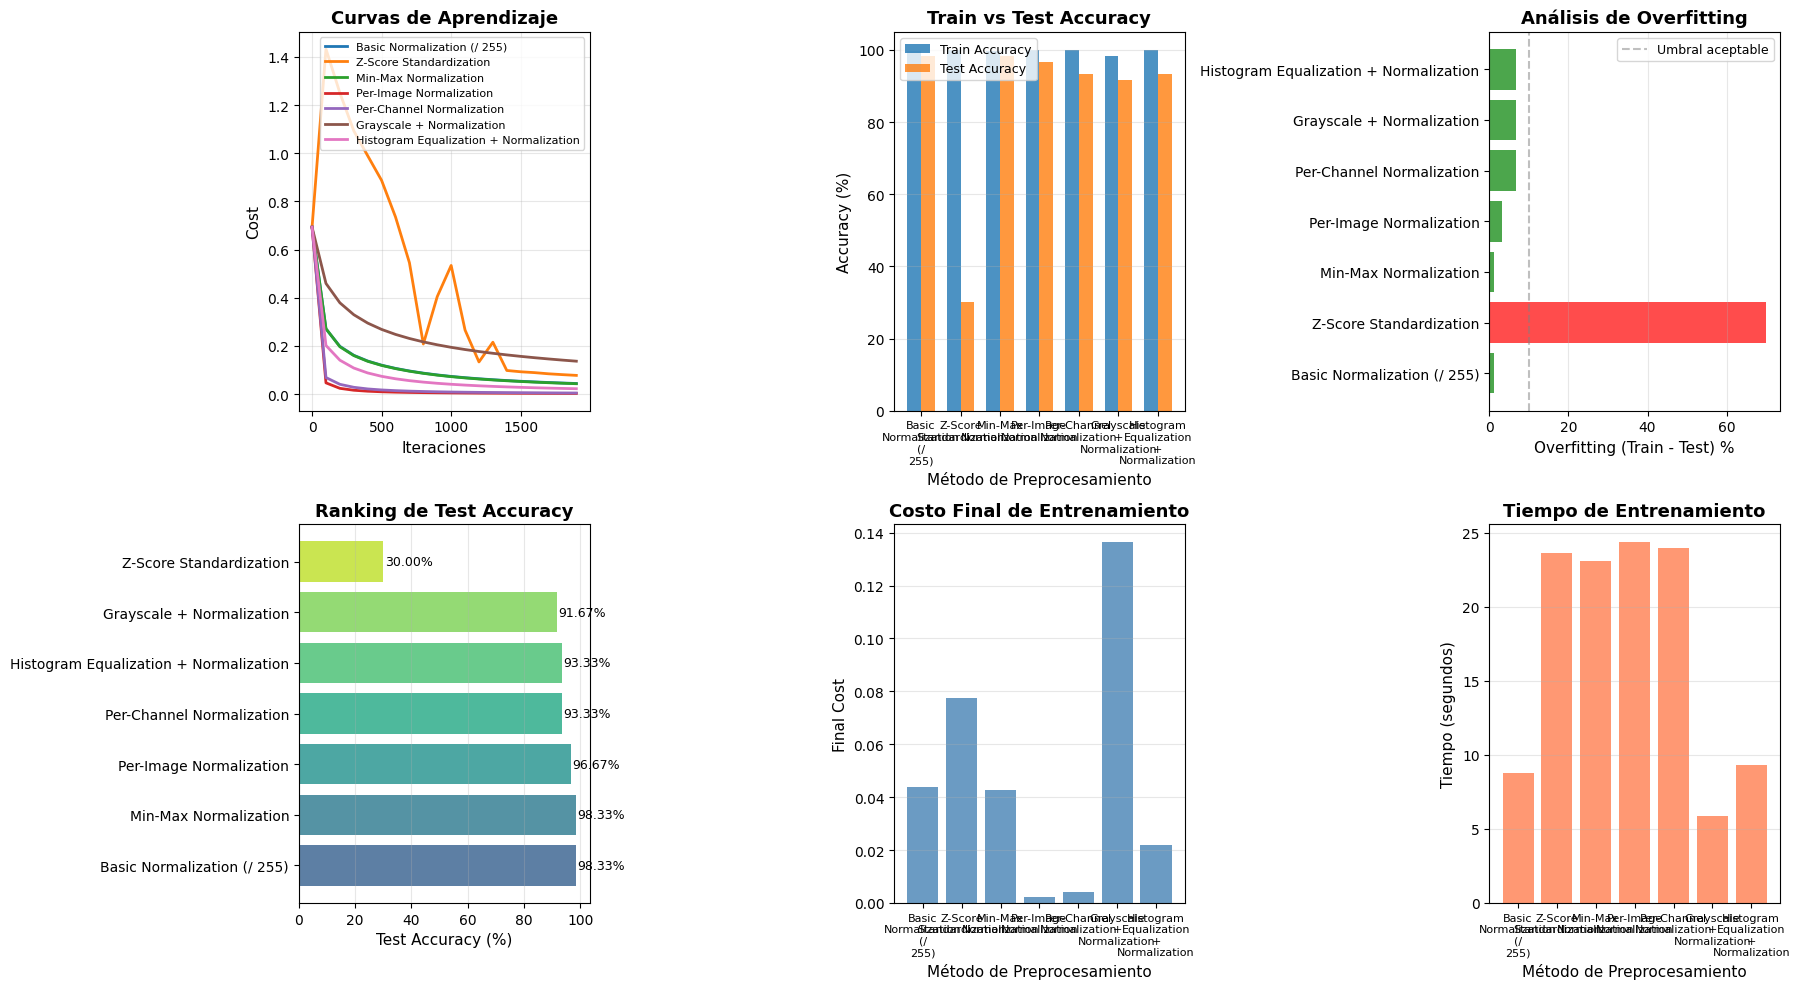


 Gráficos generados exitosamente!
 Archivo guardado: preprocessing_comparison.png



In [ ]:

import matplotlib.pyplot as plt

# Configurar estilo
plt.style.use('default')
fig = plt.figure(figsize=(18, 10))

# 1. Gráfico de curvas de aprendizaje
ax1 = plt.subplot(2, 3, 1)
for method in methods_to_test:
    costs = results[method]['costs']
    iterations = np.arange(0, len(costs) * 100, 100)
    ax1.plot(iterations, costs, label=results[method]['stats']['method'], linewidth=2)
ax1.set_xlabel('Iteraciones', fontsize=11)
ax1.set_ylabel('Cost', fontsize=11)
ax1.set_title('Curvas de Aprendizaje', fontsize=13, fontweight='bold')
ax1.legend(fontsize=8)
ax1.grid(True, alpha=0.3)

# 2. Comparación de Train vs Test Accuracy
ax2 = plt.subplot(2, 3, 2)
methods_names = [results[m]['stats']['method'] for m in methods_to_test]
train_accs = [results[m]['train_accuracy'] for m in methods_to_test]
test_accs = [results[m]['test_accuracy'] for m in methods_to_test]

x = np.arange(len(methods_names))
width = 0.35
bars1 = ax2.bar(x - width/2, train_accs, width, label='Train Accuracy', alpha=0.8)
bars2 = ax2.bar(x + width/2, test_accs, width, label='Test Accuracy', alpha=0.8)

ax2.set_xlabel('Método de Preprocesamiento', fontsize=11)
ax2.set_ylabel('Accuracy (%)', fontsize=11)
ax2.set_title('Train vs Test Accuracy', fontsize=13, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels([m.replace(' ', '\n') for m in methods_names], fontsize=8, rotation=0)
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3, axis='y')

# 3. Overfitting Analysis
ax3 = plt.subplot(2, 3, 3)
overfitting = [results[m]['train_accuracy'] - results[m]['test_accuracy'] for m in methods_to_test]
colors = ['red' if o > 15 else 'orange' if o > 10 else 'green' for o in overfitting]
bars = ax3.barh(methods_names, overfitting, color=colors, alpha=0.7)
ax3.set_xlabel('Overfitting (Train - Test) %', fontsize=11)
ax3.set_title('Análisis de Overfitting', fontsize=13, fontweight='bold')
ax3.axvline(x=10, color='gray', linestyle='--', alpha=0.5, label='Umbral aceptable')
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3, axis='x')

# 4. Test Accuracy Ranking
ax4 = plt.subplot(2, 3, 4)
sorted_methods = sorted(methods_to_test, key=lambda m: results[m]['test_accuracy'], reverse=True)
sorted_accs = [results[m]['test_accuracy'] for m in sorted_methods]
sorted_names = [results[m]['stats']['method'] for m in sorted_methods]
colors_gradient = plt.cm.viridis(np.linspace(0.3, 0.9, len(sorted_names)))
bars = ax4.barh(sorted_names, sorted_accs, color=colors_gradient, alpha=0.8)
ax4.set_xlabel('Test Accuracy (%)', fontsize=11)
ax4.set_title('Ranking de Test Accuracy', fontsize=13, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='x')
for i, v in enumerate(sorted_accs):
    ax4.text(v + 0.5, i, f'{v:.2f}%', va='center', fontsize=9)

# 5. Final Cost Comparison
ax5 = plt.subplot(2, 3, 5)
final_costs = [results[m]['final_cost'] for m in methods_to_test]
bars = ax5.bar(methods_names, final_costs, alpha=0.8, color='steelblue')
ax5.set_xlabel('Método de Preprocesamiento', fontsize=11)
ax5.set_ylabel('Final Cost', fontsize=11)
ax5.set_title('Costo Final de Entrenamiento', fontsize=13, fontweight='bold')
ax5.set_xticklabels([m.replace(' ', '\n') for m in methods_names], fontsize=8, rotation=0)
ax5.grid(True, alpha=0.3, axis='y')

# 6. Training Time Comparison
ax6 = plt.subplot(2, 3, 6)
times = [results[m]['time'] for m in methods_to_test]
bars = ax6.bar(methods_names, times, alpha=0.8, color='coral')
ax6.set_xlabel('Método de Preprocesamiento', fontsize=11)
ax6.set_ylabel('Tiempo (segundos)', fontsize=11)
ax6.set_title('Tiempo de Entrenamiento', fontsize=13, fontweight='bold')
ax6.set_xticklabels([m.replace(' ', '\n') for m in methods_names], fontsize=8, rotation=0)
ax6.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('preprocessing_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Gráficos generados exitosamente!")
print(" Archivo guardado: preprocessing_comparison.png\n")

## Mejor Modelo de Preprocesamiento

In [ ]:


print("\n" + "="*80)
print(" IDENTIFICANDO MEJOR MÉTODO DE PREPROCESAMIENTO")
print("="*80 + "\n")

# Encontrar el mejor método basado en test accuracy
best_method_key = max(results.items(), key=lambda x: x[1]['test_accuracy'])[0]
best_method_name = results[best_method_key]['stats']['method']
best_test_acc = results[best_method_key]['test_accuracy']
best_train_acc = results[best_method_key]['train_accuracy']

print(f" MEJOR MÉTODO IDENTIFICADO: {best_method_name}")
print(f"   Test Accuracy: {best_test_acc:.2f}%")
print(f"   Train Accuracy: {best_train_acc:.2f}%")
print(f"   Overfitting: {best_train_acc - best_test_acc:.2f}%")
print(f"\n{'='*80}\n")

# Recargar dataset con el mejor método
print(f" Recargando dataset con: {best_method_name}\n")

X_train_best, Y_train_best, X_test_best, Y_test_best, stats_best = load_dataset_with_preprocessing(
    bird_images, drone_images,
    preprocessing_method=best_method_key,
    target_size=(64, 64),
    max_images_per_class=150,
    train_split=0.8
)

print(f" Dataset listo para optimización de hiperparámetros\n")


 IDENTIFICANDO MEJOR MÉTODO DE PREPROCESAMIENTO

 MEJOR MÉTODO IDENTIFICADO: Basic Normalization (/ 255)
   Test Accuracy: 98.33%
   Train Accuracy: 99.58%
   Overfitting: 1.25%


 Recargando dataset con: Basic Normalization (/ 255)


Método: Basic Normalization (/ 255)
X_train shape: (12288, 240)
Y_train shape: (1, 240)
X_test shape: (12288, 60)
Y_test shape: (1, 60)

 Dataset listo para optimización de hiperparámetros



# Encontrar Mejores Hiperparametros

In [ ]:
# Instalar Optuna
!pip install optuna -q
print("✅ Optuna instalado")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.9/413.9 kB 8.0 MB/s eta 0:00:00
✅ Optuna instalado


## Estrategias de Optimizacion e Hiperparametros

## Funcion para Entregar y Evaluar

In [ ]:

import optuna
from optuna.samplers import TPESampler, RandomSampler
from optuna.pruners import HyperbandPruner, MedianPruner
from sklearn.model_selection import ParameterGrid
import warnings
warnings.filterwarnings('ignore')

# Suprimir mensajes de Optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# ============================================================================
# FUNCIÓN WRAPPER PARA ENTRENAR Y EVALUAR
# ============================================================================

def train_and_evaluate_model(X_train, Y_train, X_test, Y_test,
                             learning_rate, num_iterations, verbose=False):
    """
    Entrena el modelo del profesor y devuelve métricas
    """
    try:
        # Entrenar modelo usando las funciones del profesor
        d = model(X_train, Y_train, X_test, Y_test,
                  num_iterations=num_iterations,
                  learning_rate=learning_rate,
                  print_cost=verbose)

        # Calcular métricas
        train_accuracy = 100 - np.mean(np.abs(d['Y_prediction_train'] - Y_train)) * 100
        test_accuracy = 100 - np.mean(np.abs(d['Y_prediction_test'] - Y_test)) * 100
        final_cost = d['costs'][-1] if len(d['costs']) > 0 else float('inf')

        return {
            'train_accuracy': train_accuracy,
            'test_accuracy': test_accuracy,
            'final_cost': final_cost,
            'model_dict': d
        }
    except Exception as e:
        print(f"⚠️ Error en entrenamiento: {e}")
        return None



## Grid Search

Grid Search (Búsqueda en Cuadrícula) es un método de optimización exhaustivo que evalúa sistemáticamente todas las combinaciones posibles dentro de un espacio de hiperparámetros (valores configurables del modelo que no se aprenden automáticamente) predefinido. La estrategia funciona creando una "cuadrícula" o matriz multidimensional donde cada dimensión representa un hiperparámetro específico y cada punto en la cuadrícula corresponde a una combinación única de valores. El algoritmo entrena y evalúa el modelo con cada una de estas combinaciones, registrando la métrica de desempeño (en este caso, test accuracy o precisión en el conjunto de prueba) para posteriormente seleccionar la configuración que produce el mejor resultado. Aunque esta técnica garantiza encontrar la mejor combinación dentro del espacio definido, su principal desventaja es el alto costo computacional (tiempo y recursos de procesamiento), ya que el número de evaluaciones crece exponencialmente con la cantidad de hiperparámetros y valores considerados. Por ejemplo, si se tienen 2 hiperparámetros con 5 valores cada uno, se requieren 5×5=25 entrenamientos completos del modelo.

En la implementación realizada para el modelo de regresión logística manual, Grid Search se aplicó sobre dos hiperparámetros:

learning_rate (tasa de aprendizaje que controla el tamaño de los pasos en gradient descent) con 5 valores posibles [0.001, 0.005, 0.01, 0.05, 0.1]

num_iterations (número de iteraciones del algoritmo de optimización) con 4 valores [500, 1000, 1500, 2000]

 Resultando en un total de 20 combinaciones a evaluar.

 La función grid_search_optimization() utiliza ParameterGrid de scikit-learn para generar automáticamente todas las combinaciones posibles, y posteriormente itera sobre cada una, llamando a train_and_evaluate_model() que ejecuta las funciones manuales  (initialize_with_zeros, propagate, optimize, predict) con los hiperparámetros específicos de cada trial (intento de configuración).

 Durante el proceso, el algoritmo mantiene registro del mejor test accuracy observado y sus hiperparámetros asociados, actualizando estos valores cada vez que encuentra una configuración superior. Al finalizar las 20 evaluaciones, la función retorna el mejor conjunto de hiperparámetros encontrado junto con métricas de desempeño y tiempo de ejecución, permitiendo comparar esta estrategia con otros métodos de optimización más sofisticados.

In [ ]:

# 1. GRID SEARCH
# ============================================================================

def grid_search_optimization(X_train, Y_train, X_test, Y_test, verbose=True):
    """
    Grid Search: Búsqueda exhaustiva en cuadrícula
    Prueba todas las combinaciones posibles de hiperparámetros
    """
    print("\n" + "="*80)
    print(" ESTRATEGIA 1: GRID SEARCH - Búsqueda Exhaustiva")
    print("="*80 + "\n")

    # Definir espacio de búsqueda
    param_grid = {
        'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1],
        'num_iterations': [500, 1000, 1500, 2000]
    }

    print(f" Espacio de búsqueda:")
    for param, values in param_grid.items():
        print(f"   {param}: {values}")

    total_combinations = np.prod([len(v) for v in param_grid.values()])
    print(f"\n Total de combinaciones a probar: {total_combinations}\n")

    # Generar todas las combinaciones
    all_params = list(ParameterGrid(param_grid))

    best_score = -float('inf')
    best_params = None
    all_results = []

    start_time = time.time()

    for idx, params in enumerate(all_params, 1):
        if verbose:
            print(f"[{idx}/{total_combinations}] Testing: lr={params['learning_rate']:.4f}, "
                  f"iter={params['num_iterations']}", end=" ... ")

        result = train_and_evaluate_model(
            X_train, Y_train, X_test, Y_test,
            learning_rate=params['learning_rate'],
            num_iterations=params['num_iterations'],
            verbose=False
        )

        if result is not None:
            result['params'] = params
            all_results.append(result)

            if result['test_accuracy'] > best_score:
                best_score = result['test_accuracy']
                best_params = params
                if verbose:
                    print(f"Test Acc: {result['test_accuracy']:.2f}% ⭐ NEW BEST!")
            else:
                if verbose:
                    print(f"Test Acc: {result['test_accuracy']:.2f}%")

    elapsed_time = time.time() - start_time

    print(f"\n{'='*80}")
    print(f" GRID SEARCH - MEJORES HIPERPARÁMETROS:")
    print(f"{'='*80}")
    print(f"   Learning Rate: {best_params['learning_rate']}")
    print(f"   Iterations: {best_params['num_iterations']}")
    print(f"   Best Test Accuracy: {best_score:.2f}%")
    print(f"   Tiempo total: {elapsed_time:.2f} segundos")
    print(f"{'='*80}\n")

    return {
        'strategy': 'Grid Search',
        'best_params': best_params,
        'best_score': best_score,
        'all_results': all_results,
        'time': elapsed_time
    }

## Random Search

Random Search (Búsqueda Aleatoria) es un método de optimización de hiperparámetros que, en lugar de evaluar exhaustivamente todas las combinaciones posibles, selecciona configuraciones de manera estocástica (aleatoria) dentro de un espacio continuo o discreto de hiperparámetros. La estrategia se basa en el principio de que no todos los hiperparámetros tienen la misma importancia en el desempeño del modelo, y que una búsqueda aleatoria bien diseñada puede encontrar configuraciones competitivas con significativamente menos evaluaciones que Grid Search. El método muestrea valores de manera uniforme o mediante distribuciones específicas (como log-uniform para learning rate, que genera más valores pequeños que grandes, reflejando la naturaleza logarítmica de este hiperparámetro) dentro de rangos continuos predefinidos. Random Search ha demostrado ser particularmente efectivo en espacios de alta dimensionalidad (muchos hiperparámetros) porque explora más eficientemente el espacio al no estar limitado a una cuadrícula fija, y porque estadísticamente tiene mayor probabilidad de encontrar buenas configuraciones cuando solo algunos hiperparámetros son verdaderamente importantes.

En la implementación realizada, Random Search se ejecutó utilizando la biblioteca Optuna, que proporciona un framework (marco de trabajo) especializado para optimización de hiperparámetros. La función random_search_optimization() configura un espacio de búsqueda continuo para learning_rate en el rango [0.0001, 0.5] con distribución log-uniform (log=True), lo que significa que los valores se muestrean uniformemente en escala logarítmica, generando más candidatos en el rango [0.0001, 0.01] que en [0.1, 0.5], y para num_iterations en el rango [500, 3000] con pasos de 100 y distribución uniforme.

Se creó un estudio de Optuna con RandomSampler(seed=42) que garantiza reproducibilidad (resultados idénticos en ejecuciones repetidas) mediante una semilla aleatoria fija. La función objective(trial) define cómo se evalúa cada configuración: Optuna sugiere valores aleatorios para cada hiperparámetro (trial.suggest_float, trial.suggest_int), se entrena el modelo manual del profesor con esos valores llamando a train_and_evaluate_model(), y se retorna el test accuracy. El estudio ejecuta 20 trials (intentos de configuración), cada uno con hiperparámetros completamente diferentes, y al finalizar identifica automáticamente la configuración que produjo el mejor resultado, retornando los hiperparámetros óptimos junto con métricas de desempeño y tiempo de ejecución.

In [ ]:
# ============================================================================
# 2. RANDOM SEARCH
# ============================================================================

def random_search_optimization(X_train, Y_train, X_test, Y_test,
                               n_trials=20, verbose=True):
    """
    Random Search: Búsqueda aleatoria en el espacio de hiperparámetros
    Más eficiente que Grid Search para espacios grandes
    """
    print("\n" + "="*80)
    print(" ESTRATEGIA 2: RANDOM SEARCH - Búsqueda Aleatoria")
    print("="*80 + "\n")

    print(f" Configuración:")
    print(f"   Número de trials: {n_trials}")
    print(f"   Learning rate: [0.0001, 0.5] (log-uniform)")
    print(f"   Iterations: [500, 3000] (uniform)\n")

    def objective(trial):
        # Sugerir hiperparámetros de manera aleatoria
        lr = trial.suggest_float('learning_rate', 0.0001, 0.5, log=True)
        iterations = trial.suggest_int('num_iterations', 500, 3000, step=100)

        result = train_and_evaluate_model(
            X_train, Y_train, X_test, Y_test,
            learning_rate=lr,
            num_iterations=iterations,
            verbose=False
        )

        if result is None:
            return 0.0

        return result['test_accuracy']

    start_time = time.time()

    # Crear estudio con sampler aleatorio
    study = optuna.create_study(
        direction='maximize',
        sampler=RandomSampler(seed=42)
    )

    study.optimize(objective, n_trials=n_trials, show_progress_bar=verbose)

    elapsed_time = time.time() - start_time

    print(f"\n{'='*80}")
    print(f" RANDOM SEARCH - MEJORES HIPERPARÁMETROS:")
    print(f"{'='*80}")
    print(f"   Learning Rate: {study.best_params['learning_rate']:.6f}")
    print(f"   Iterations: {study.best_params['num_iterations']}")
    print(f"   Best Test Accuracy: {study.best_value:.2f}%")
    print(f"   Tiempo total: {elapsed_time:.2f} segundos")
    print(f"{'='*80}\n")

    return {
        'strategy': 'Random Search',
        'best_params': study.best_params,
        'best_score': study.best_value,
        'study': study,
        'time': elapsed_time
    }




## Bayesian Optimization

Bayesian Optimization (Optimización Bayesiana) es un método secuencial de optimización de hiperparámetros que utiliza modelos probabilísticos (modelos estadísticos que representan incertidumbre mediante distribuciones de probabilidad) para guiar inteligentemente la búsqueda hacia regiones prometedoras del espacio de hiperparámetros. A diferencia de Random Search que selecciona configuraciones de manera completamente aleatoria e independiente, Bayesian Optimization construye un modelo sustituto o surrogate model (aproximación computacionalmente barata de la función objetivo real) que predice el desempeño esperado de configuraciones no evaluadas basándose en los resultados de trials anteriores. El algoritmo utiliza este modelo junto con una función de adquisición o acquisition function (criterio matemático que balancea exploración de regiones desconocidas con explotación de regiones prometedoras conocidas) para decidir qué configuración evaluar a continuación, maximizando la probabilidad de mejora o la mejora esperada. En esta implementación se utiliza TPE (Tree-structured Parzen Estimator, Estimador de Parzen con Estructura de Árbol), que modela por separado las distribuciones de probabilidad de hiperparámetros que produjeron buenos resultados versus aquellos que produjeron malos resultados, y sugiere nuevas configuraciones muestreando de la distribución de "buenos" hiperparámetros. Esta estrategia es particularmente efectiva cuando cada evaluación es computacionalmente costosa, ya que aprovecha información histórica para converger más rápidamente hacia el óptimo global con menos trials que métodos no informados.

La implementación de Bayesian Optimization utiliza el framework Optuna con TPESampler como algoritmo de muestreo secuencial inteligente, operando sobre el mismo espacio de búsqueda que Random Search: learning_rate en [0.0001, 0.5] con distribución log-uniform e num_iterations en [500, 3000] con pasos de 100. La diferencia fundamental radica en el sampler: mientras RandomSampler genera configuraciones independientes sin memoria de trials anteriores, TPESampler mantiene un historial completo de todas las configuraciones evaluadas y sus resultados, actualizando internamente dos modelos de densidad de probabilidad l(θ) y g(θ) que representan la distribución de hiperparámetros asociados con los mejores resultados y con resultados peores respectivamente. En cada nuevo trial t, TPE calcula la Expected Improvement (Mejora Esperada, métrica que cuantifica cuánto se espera mejorar el mejor resultado conocido) para diferentes configuraciones candidatas, seleccionando aquella que maximiza l(θ)/g(θ), es decir, la configuración más probable de estar en la distribución de "buenos" hiperparámetros relativo a estar en la distribución de "malos" hiperparámetros. Este proceso iterativo de 20 trials permite que cada evaluación sea informada por las anteriores, concentrando la búsqueda progresivamente en regiones del espacio con alta probabilidad de contener configuraciones óptimas, logrando típicamente mejores resultados que Random Search con el mismo presupuesto computacional de evaluaciones.

In [ ]:
# ============================================================================
# 3. BAYESIAN OPTIMIZATION
# ============================================================================

def bayesian_optimization(X_train, Y_train, X_test, Y_test,
                         n_trials=20, verbose=True):
    """
    Bayesian Optimization: Usa modelos probabilísticos para guiar la búsqueda
    Más inteligente que Random Search, aprende de trials anteriores
    """
    print("\n" + "="*80)
    print(" ESTRATEGIA 3: BAYESIAN OPTIMIZATION - Optimización Bayesiana")
    print("="*80 + "\n")

    print(f" Configuración:")
    print(f"   Número de trials: {n_trials}")
    print(f"   Algoritmo: TPE (Tree-structured Parzen Estimator)")
    print(f"   Learning rate: [0.0001, 0.5] (log-uniform)")
    print(f"   Iterations: [500, 3000] (uniform)\n")

    def objective(trial):
        # Sugerir hiperparámetros usando TPE
        lr = trial.suggest_float('learning_rate', 0.0001, 0.5, log=True)
        iterations = trial.suggest_int('num_iterations', 500, 3000, step=100)

        result = train_and_evaluate_model(
            X_train, Y_train, X_test, Y_test,
            learning_rate=lr,
            num_iterations=iterations,
            verbose=False
        )

        if result is None:
            return 0.0

        return result['test_accuracy']

    start_time = time.time()

    # Crear estudio con sampler bayesiano (TPE)
    study = optuna.create_study(
        direction='maximize',
        sampler=TPESampler(seed=42)
    )

    study.optimize(objective, n_trials=n_trials, show_progress_bar=verbose)

    elapsed_time = time.time() - start_time

    print(f"\n{'='*80}")
    print(f"🏆 BAYESIAN OPTIMIZATION - MEJORES HIPERPARÁMETROS:")
    print(f"{'='*80}")
    print(f"   Learning Rate: {study.best_params['learning_rate']:.6f}")
    print(f"   Iterations: {study.best_params['num_iterations']}")
    print(f"   Best Test Accuracy: {study.best_value:.2f}%")
    print(f"   Tiempo total: {elapsed_time:.2f} segundos")
    print(f"{'='*80}\n")

    return {
        'strategy': 'Bayesian Optimization',
        'best_params': study.best_params,
        'best_score': study.best_value,
        'study': study,
        'time': elapsed_time
    }




## Hyperband

Hyperband es un algoritmo de optimización de hiperparámetros basado en early stopping adaptativo (detención temprana adaptable que termina el entrenamiento de configuraciones no prometedoras antes de completar todas las iteraciones) que asigna recursos computacionales de manera eficiente mediante un proceso de eliminación sucesiva similar a un torneo deportivo. La estrategia fundamental consiste en entrenar inicialmente muchas configuraciones diferentes con un presupuesto limitado de recursos (en este caso, pocas iteraciones de gradient descent), evaluar su desempeño intermedio, y eliminar o "podar" (pruning, proceso de descartar configuraciones con bajo rendimiento) aquellas que muestran resultados inferiores, asignando progresivamente más recursos (más iteraciones de entrenamiento) únicamente a las configuraciones que demuestran ser prometedoras. El algoritmo utiliza un parámetro llamado reduction factor o factor de reducción (proporción en que se reduce el número de configuraciones en cada ronda, típicamente 3 o 4) para determinar cuántas configuraciones sobreviven a cada etapa de eliminación. Esta estrategia es especialmente efectiva porque evita desperdiciar tiempo computacional entrenando hasta convergencia completa (alcanzar el máximo número de iteraciones) configuraciones que desde etapas tempranas muestran bajo desempeño, permitiendo explorar un espacio más amplio de hiperparámetros con el mismo presupuesto computacional total que métodos tradicionales.

La implementación de Hyperband en el código combina HyperbandPruner con TPESampler de Optuna, creando un sistema híbrido donde TPE sugiere inteligentemente nuevas configuraciones mientras Hyperband decide cuáles merecen continuar entrenándose. El pruner se configura con tres parámetros críticos: min_resource=500 (número mínimo de iteraciones antes de poder podar un trial, estableciendo la primera evaluación intermedia), max_resource=3000 (máximo de iteraciones que puede alcanzar una configuración exitosa), y reduction_factor=3 (indica que en cada ronda se eliminan aproximadamente 2/3 de las configuraciones, manteniendo solo el tercio superior). Durante la ejecución, la función objective(trial) entrena el modelo del  con una configuración específica de hiperparámetros, y crucialmente, llama a trial.report(result['test_accuracy'], iterations) para informar al pruner sobre el desempeño alcanzado después de iterations iteraciones.

El pruner compara internamente este resultado con los de otras configuraciones en la misma etapa de entrenamiento, y si el rendimiento está significativamente por debajo del percentil esperado (configuración no competitiva), la llamada a trial.should_prune() retorna True, lanzando una excepción optuna.TrialPruned() que termina inmediatamente ese trial sin completar las iteraciones restantes, liberando recursos computacionales. El algoritmo ejecuta 30 trials, pero gracias al pruning, muchos se terminan anticipadamente (como muestra el contador n_pruned), permitiendo que las configuraciones prometedoras reciban más evaluaciones exhaustivas, resultando típicamente en mejor eficiencia tiempo-calidad que estrategias sin early stopping.

In [ ]:
# ============================================================================
# 4. HYPERBAND
# ============================================================================

def hyperband_optimization(X_train, Y_train, X_test, Y_test,
                          n_trials=30, verbose=True):
    """
    Hyperband: Early stopping adaptativo
    Asigna más recursos (iterations) a configuraciones prometedoras
    """
    print("\n" + "="*80)
    print(" ESTRATEGIA 4: HYPERBAND - Early Stopping Adaptativo")
    print("="*80 + "\n")

    print(f" Configuración:")
    print(f"   Número de trials: {n_trials}")
    print(f"   Algoritmo: Hyperband con TPE")
    print(f"   Learning rate: [0.0001, 0.5] (log-uniform)")
    print(f"   Iterations: [500, 3000] (uniform)")
    print(f"   Pruning: Detiene trials no prometedores tempranamente\n")

    def objective(trial):
        # Sugerir hiperparámetros
        lr = trial.suggest_float('learning_rate', 0.0001, 0.5, log=True)
        iterations = trial.suggest_int('num_iterations', 500, 3000, step=100)

        # Para hyperband, evaluamos en checkpoints intermedios
        result = train_and_evaluate_model(
            X_train, Y_train, X_test, Y_test,
            learning_rate=lr,
            num_iterations=iterations,
            verbose=False
        )

        if result is None:
            return 0.0

        # Reportar valores intermedios para pruning
        trial.report(result['test_accuracy'], iterations)

        # Verificar si se debe hacer pruning
        if trial.should_prune():
            raise optuna.TrialPruned()

        return result['test_accuracy']

    start_time = time.time()

    # Crear estudio con Hyperband pruner
    study = optuna.create_study(
        direction='maximize',
        sampler=TPESampler(seed=42),
        pruner=HyperbandPruner(
            min_resource=500,
            max_resource=3000,
            reduction_factor=3
        )
    )

    study.optimize(objective, n_trials=n_trials, show_progress_bar=verbose)

    elapsed_time = time.time() - start_time

    print(f"\n{'='*80}")
    print(f" HYPERBAND - MEJORES HIPERPARÁMETROS:")
    print(f"{'='*80}")
    print(f"   Learning Rate: {study.best_params['learning_rate']:.6f}")
    print(f"   Iterations: {study.best_params['num_iterations']}")
    print(f"   Best Test Accuracy: {study.best_value:.2f}%")
    print(f"   Trials completados: {len(study.trials)}")
    print(f"   Trials podados (pruned): {len([t for t in study.trials if t.state == optuna.trial.TrialState.PRUNED])}")
    print(f"   Tiempo total: {elapsed_time:.2f} segundos")
    print(f"{'='*80}\n")

    return {
        'strategy': 'Hyperband',
        'best_params': study.best_params,
        'best_score': study.best_value,
        'study': study,
        'time': elapsed_time,
        'n_pruned': len([t for t in study.trials if t.state == optuna.trial.TrialState.PRUNED])
    }

## Optimización Hiperparámetros: Estrategias de Optimziación

In [ ]:
# ============================================================================
# EJECUTAR TODAS LAS ESTRATEGIAS DE OPTIMIZACIÓN
# ============================================================================

print("\n" + ""*40)
print("INICIANDO OPTIMIZACIÓN DE HIPERPARÁMETROS")
print(f"Dataset: {best_method_name}")
print("qu"*40 + "\n")

# Diccionario para almacenar resultados
optimization_results = {}

# 1. Grid Search
print("Ejecutando Grid Search...")
optimization_results['grid_search'] = grid_search_optimization(
    X_train_best, Y_train_best, X_test_best, Y_test_best,
    verbose=True
)

# 2. Random Search
print("\nEjecutando Random Search...")
optimization_results['random_search'] = random_search_optimization(
    X_train_best, Y_train_best, X_test_best, Y_test_best,
    n_trials=20,
    verbose=True
)

# 3. Bayesian Optimization
print("\nEjecutando Bayesian Optimization...")
optimization_results['bayesian'] = bayesian_optimization(
    X_train_best, Y_train_best, X_test_best, Y_test_best,
    n_trials=20,
    verbose=True
)

# 4. Hyperband
print("\nEjecutando Hyperband...")
optimization_results['hyperband'] = hyperband_optimization(
    X_train_best, Y_train_best, X_test_best, Y_test_best,
    n_trials=30,
    verbose=True
)

print("\n" + "="*80)
print(" TODAS LAS ESTRATEGIAS COMPLETADAS")
print("="*80 + "\n")



INICIANDO OPTIMIZACIÓN DE HIPERPARÁMETROS
Dataset: Basic Normalization (/ 255)
ququququququququququququququququququququququququququququququququququququququququ

Ejecutando Grid Search...

 ESTRATEGIA 1: GRID SEARCH - Búsqueda Exhaustiva

 Espacio de búsqueda:
   learning_rate: [0.001, 0.005, 0.01, 0.05, 0.1]
   num_iterations: [500, 1000, 1500, 2000]

 Total de combinaciones a probar: 20

[1/20] Testing: lr=0.0010, iter=500 ... train accuracy: 92.91666666666667 %
test accuracy: 90.0 %
Test Acc: 90.00% ⭐ NEW BEST!
[2/20] Testing: lr=0.0010, iter=1000 ... train accuracy: 97.5 %
test accuracy: 96.66666666666667 %
Test Acc: 96.67% ⭐ NEW BEST!
[3/20] Testing: lr=0.0010, iter=1500 ... train accuracy: 98.33333333333333 %
test accuracy: 98.33333333333333 %
Test Acc: 98.33% ⭐ NEW BEST!
[4/20] Testing: lr=0.0010, iter=2000 ... train accuracy: 98.75 %
test accuracy: 98.33333333333333 %
Test Acc: 98.33%
[5/20] Testing: lr=0.0050, iter=500 ... train accuracy: 98.75 %
test accuracy: 98.33333333333

  0%|          | 0/20 [00:00<?, ?it/s]

train accuracy: 99.58333333333333 %
test accuracy: 100.0 %
train accuracy: 100.0 %
test accuracy: 98.33333333333333 %
train accuracy: 91.25 %
test accuracy: 88.33333333333333 %
train accuracy: 92.08333333333333 %
test accuracy: 88.33333333333333 %
train accuracy: 100.0 %
test accuracy: 98.33333333333333 %
train accuracy: 91.25 %
test accuracy: 88.33333333333333 %
train accuracy: 100.0 %
test accuracy: 100.0 %
train accuracy: 91.66666666666667 %
test accuracy: 88.33333333333333 %
train accuracy: 98.75 %
test accuracy: 98.33333333333333 %
train accuracy: 99.58333333333333 %
test accuracy: 100.0 %
train accuracy: 99.58333333333333 %
test accuracy: 98.33333333333333 %
train accuracy: 98.75 %
test accuracy: 98.33333333333333 %
train accuracy: 99.58333333333333 %
test accuracy: 100.0 %
train accuracy: 97.5 %
test accuracy: 96.66666666666667 %
train accuracy: 99.58333333333333 %
test accuracy: 98.33333333333333 %
train accuracy: 99.58333333333333 %
test accuracy: 98.33333333333333 %
train acc

  0%|          | 0/20 [00:00<?, ?it/s]

train accuracy: 99.58333333333333 %
test accuracy: 100.0 %
train accuracy: 100.0 %
test accuracy: 98.33333333333333 %
train accuracy: 91.25 %
test accuracy: 88.33333333333333 %
train accuracy: 92.08333333333333 %
test accuracy: 88.33333333333333 %
train accuracy: 100.0 %
test accuracy: 98.33333333333333 %
train accuracy: 91.25 %
test accuracy: 88.33333333333333 %
train accuracy: 100.0 %
test accuracy: 100.0 %
train accuracy: 91.66666666666667 %
test accuracy: 88.33333333333333 %
train accuracy: 98.75 %
test accuracy: 98.33333333333333 %
train accuracy: 99.58333333333333 %
test accuracy: 100.0 %
train accuracy: 100.0 %
test accuracy: 100.0 %
train accuracy: 100.0 %
test accuracy: 98.33333333333333 %
train accuracy: 100.0 %
test accuracy: 98.33333333333333 %
train accuracy: 99.58333333333333 %
test accuracy: 100.0 %
train accuracy: 100.0 %
test accuracy: 98.33333333333333 %
train accuracy: 99.58333333333333 %
test accuracy: 98.33333333333333 %
train accuracy: 99.58333333333333 %
test acc

  0%|          | 0/30 [00:00<?, ?it/s]

train accuracy: 99.58333333333333 %
test accuracy: 100.0 %
train accuracy: 100.0 %
test accuracy: 98.33333333333333 %
train accuracy: 91.25 %
test accuracy: 88.33333333333333 %
train accuracy: 92.08333333333333 %
test accuracy: 88.33333333333333 %
train accuracy: 100.0 %
test accuracy: 98.33333333333333 %
train accuracy: 91.25 %
test accuracy: 88.33333333333333 %
train accuracy: 100.0 %
test accuracy: 100.0 %
train accuracy: 91.66666666666667 %
test accuracy: 88.33333333333333 %
train accuracy: 98.75 %
test accuracy: 98.33333333333333 %
train accuracy: 99.58333333333333 %
test accuracy: 100.0 %
train accuracy: 100.0 %
test accuracy: 100.0 %
train accuracy: 100.0 %
test accuracy: 98.33333333333333 %
train accuracy: 100.0 %
test accuracy: 98.33333333333333 %
train accuracy: 99.58333333333333 %
test accuracy: 100.0 %
train accuracy: 100.0 %
test accuracy: 98.33333333333333 %
train accuracy: 99.58333333333333 %
test accuracy: 98.33333333333333 %
train accuracy: 99.58333333333333 %
test acc

In [ ]:
# ============================================================================
# COMPARACIÓN Y RESUMEN DE TODAS LAS ESTRATEGIAS
# ============================================================================

print("\n" + "="*80)
print(" RESUMEN COMPARATIVO DE ESTRATEGIAS DE OPTIMIZACIÓN")
print("="*80 + "\n")

# Crear tabla comparativa
print(f"{'Estrategia':<25} {'Best Test Acc':<15} {'Learning Rate':<15} {'Iterations':<12} {'Tiempo (s)':<12}")
print("-"*80)

for key, result in optimization_results.items():
    strategy_name = result['strategy']
    best_score = result['best_score']
    lr = result['best_params']['learning_rate']
    iterations = result['best_params']['num_iterations']
    exec_time = result['time']

    print(f"{strategy_name:<25} {best_score:>13.2f}% {lr:>14.6f} {iterations:>11} {exec_time:>11.2f}")

print("="*80 + "\n")

# Encontrar la mejor estrategia
best_strategy = max(optimization_results.items(), key=lambda x: x[1]['best_score'])
best_strategy_name = best_strategy[1]['strategy']
best_strategy_score = best_strategy[1]['best_score']

print(f" MEJOR ESTRATEGIA: {best_strategy_name}")
print(f"   Test Accuracy: {best_strategy_score:.2f}%")
print(f"   Learning Rate: {best_strategy[1]['best_params']['learning_rate']:.6f}")
print(f"   Iterations: {best_strategy[1]['best_params']['num_iterations']}")
print(f"   Tiempo: {best_strategy[1]['time']:.2f} segundos\n")

# Comparar con el baseline (experimento original)
baseline_score = results[best_method_key]['test_accuracy']
improvement = best_strategy_score - baseline_score

print(f" MEJORA SOBRE BASELINE:")
print(f"   Baseline (sin optimización): {baseline_score:.2f}%")
print(f"   Mejor resultado optimizado: {best_strategy_score:.2f}%")
print(f"   Mejora absoluta: {improvement:+.2f}%")
print(f"   Mejora relativa: {(improvement/baseline_score)*100:+.2f}%\n")

print("="*80 + "\n")


 RESUMEN COMPARATIVO DE ESTRATEGIAS DE OPTIMIZACIÓN

Estrategia                Best Test Acc   Learning Rate   Iterations   Tiempo (s)  
--------------------------------------------------------------------------------
Grid Search                      100.00%       0.005000        1000      101.44
Random Search                    100.00%       0.002429        2900      120.02
Bayesian Optimization            100.00%       0.002429        2900      122.34
Hyperband                        100.00%       0.002429        2900      176.26

 MEJOR ESTRATEGIA: Grid Search
   Test Accuracy: 100.00%
   Learning Rate: 0.005000
   Iterations: 1000
   Tiempo: 101.44 segundos

 MEJORA SOBRE BASELINE:
   Baseline (sin optimización): 98.33%
   Mejor resultado optimizado: 100.00%
   Mejora absoluta: +1.67%
   Mejora relativa: +1.69%




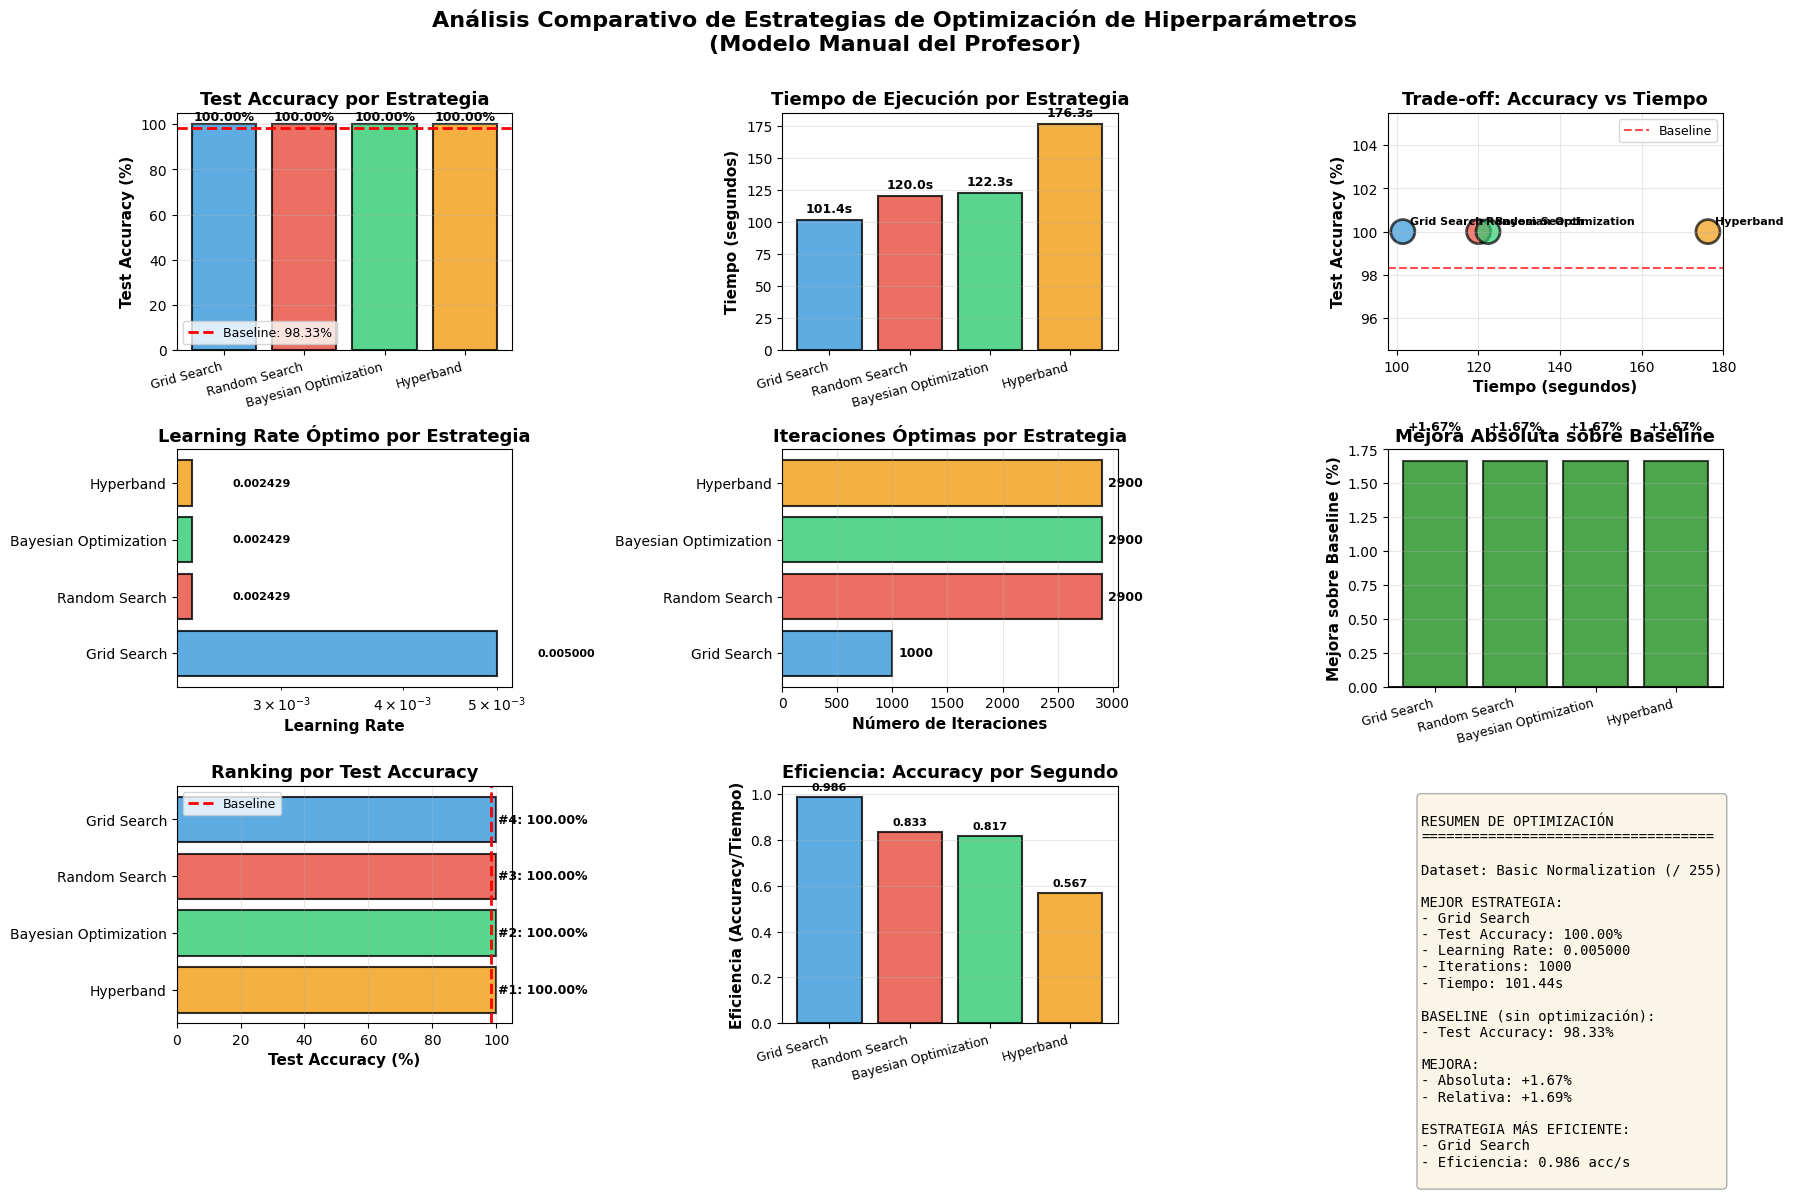


 Gráficos generados exitosamente!
 Archivo guardado: optimization_comparison.png



In [ ]:
# ============================================================================
# VISUALIZACIÓN DE RESULTADOS DE OPTIMIZACIÓN DE HIPERPARÁMETROS
# ============================================================================

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(18, 12))

# Extraer datos para graficar
strategies = list(optimization_results.keys())
strategy_names = [optimization_results[s]['strategy'] for s in strategies]
test_accuracies = [optimization_results[s]['best_score'] for s in strategies]
times = [optimization_results[s]['time'] for s in strategies]
learning_rates = [optimization_results[s]['best_params']['learning_rate'] for s in strategies]
iterations = [optimization_results[s]['best_params']['num_iterations'] for s in strategies]

# Colores consistentes
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

# ============================================================================
# 1. Test Accuracy por Estrategia
# ============================================================================
ax1 = plt.subplot(3, 3, 1)
bars = ax1.bar(strategy_names, test_accuracies, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax1.axhline(y=baseline_score, color='red', linestyle='--', linewidth=2, label=f'Baseline: {baseline_score:.2f}%')
ax1.set_ylabel('Test Accuracy (%)', fontsize=11, fontweight='bold')
ax1.set_title('Test Accuracy por Estrategia', fontsize=13, fontweight='bold')
ax1.set_xticklabels(strategy_names, rotation=15, ha='right', fontsize=9)
ax1.legend(fontsize=9)
ax1.grid(True, alpha=0.3, axis='y')

# Agregar valores encima de las barras
for i, (bar, val) in enumerate(zip(bars, test_accuracies)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{val:.2f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

# ============================================================================
# 2. Tiempo de Ejecución por Estrategia
# ============================================================================
ax2 = plt.subplot(3, 3, 2)
bars = ax2.bar(strategy_names, times, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax2.set_ylabel('Tiempo (segundos)', fontsize=11, fontweight='bold')
ax2.set_title('Tiempo de Ejecución por Estrategia', fontsize=13, fontweight='bold')
ax2.set_xticklabels(strategy_names, rotation=15, ha='right', fontsize=9)
ax2.grid(True, alpha=0.3, axis='y')

# Agregar valores
for bar, val in zip(bars, times):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + max(times)*0.02,
             f'{val:.1f}s', ha='center', va='bottom', fontsize=9, fontweight='bold')

# ============================================================================
# 3. Trade-off: Accuracy vs Tiempo
# ============================================================================
ax3 = plt.subplot(3, 3, 3)
scatter = ax3.scatter(times, test_accuracies, s=300, c=colors, alpha=0.7, edgecolors='black', linewidth=2)
ax3.axhline(y=baseline_score, color='red', linestyle='--', linewidth=1.5, alpha=0.7, label='Baseline')
ax3.set_xlabel('Tiempo (segundos)', fontsize=11, fontweight='bold')
ax3.set_ylabel('Test Accuracy (%)', fontsize=11, fontweight='bold')
ax3.set_title('Trade-off: Accuracy vs Tiempo', fontsize=13, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.legend(fontsize=9)

# Etiquetar puntos
for i, name in enumerate(strategy_names):
    ax3.annotate(name, (times[i], test_accuracies[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=8, fontweight='bold')

# ============================================================================
# 4. Learning Rate Encontrado
# ============================================================================
ax4 = plt.subplot(3, 3, 4)
bars = ax4.barh(strategy_names, learning_rates, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax4.set_xlabel('Learning Rate', fontsize=11, fontweight='bold')
ax4.set_title('Learning Rate Óptimo por Estrategia', fontsize=13, fontweight='bold')
ax4.set_xscale('log')
ax4.grid(True, alpha=0.3, axis='x')

# Agregar valores
for bar, val in zip(bars, learning_rates):
    width = bar.get_width()
    ax4.text(width * 1.1, bar.get_y() + bar.get_height()/2.,
             f'{val:.6f}', ha='left', va='center', fontsize=8, fontweight='bold')

# ============================================================================
# 5. Número de Iteraciones Encontrado
# ============================================================================
ax5 = plt.subplot(3, 3, 5)
bars = ax5.barh(strategy_names, iterations, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax5.set_xlabel('Número de Iteraciones', fontsize=11, fontweight='bold')
ax5.set_title('Iteraciones Óptimas por Estrategia', fontsize=13, fontweight='bold')
ax5.grid(True, alpha=0.3, axis='x')

# Agregar valores
for bar, val in zip(bars, iterations):
    width = bar.get_width()
    ax5.text(width + max(iterations)*0.02, bar.get_y() + bar.get_height()/2.,
             f'{val}', ha='left', va='center', fontsize=9, fontweight='bold')

# ============================================================================
# 6. Mejora sobre Baseline
# ============================================================================
ax6 = plt.subplot(3, 3, 6)
improvements = [acc - baseline_score for acc in test_accuracies]
colors_improvement = ['green' if imp > 0 else 'red' for imp in improvements]
bars = ax6.bar(strategy_names, improvements, color=colors_improvement, alpha=0.7, edgecolor='black', linewidth=1.5)
ax6.axhline(y=0, color='black', linestyle='-', linewidth=2)
ax6.set_ylabel('Mejora sobre Baseline (%)', fontsize=11, fontweight='bold')
ax6.set_title('Mejora Absoluta sobre Baseline', fontsize=13, fontweight='bold')
ax6.set_xticklabels(strategy_names, rotation=15, ha='right', fontsize=9)
ax6.grid(True, alpha=0.3, axis='y')

# Agregar valores
for bar, val in zip(bars, improvements):
    height = bar.get_height()
    y_pos = height + 0.2 if height > 0 else height - 0.2
    ax6.text(bar.get_x() + bar.get_width()/2., y_pos,
             f'{val:+.2f}%', ha='center', va='bottom' if height > 0 else 'top',
             fontsize=9, fontweight='bold')

# ============================================================================
# 7. Ranking de Estrategias
# ============================================================================
ax7 = plt.subplot(3, 3, 7)
sorted_indices = np.argsort(test_accuracies)[::-1]
sorted_names = [strategy_names[i] for i in sorted_indices]
sorted_accs = [test_accuracies[i] for i in sorted_indices]
sorted_colors = [colors[i] for i in sorted_indices]

bars = ax7.barh(sorted_names, sorted_accs, color=sorted_colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax7.axvline(x=baseline_score, color='red', linestyle='--', linewidth=2, label='Baseline')
ax7.set_xlabel('Test Accuracy (%)', fontsize=11, fontweight='bold')
ax7.set_title('Ranking por Test Accuracy', fontsize=13, fontweight='bold')
ax7.legend(fontsize=9)
ax7.grid(True, alpha=0.3, axis='x')

# Agregar valores y posiciones
for i, (bar, val) in enumerate(zip(bars, sorted_accs)):
    width = bar.get_width()
    ax7.text(width + 0.5, bar.get_y() + bar.get_height()/2.,
             f'#{i+1}: {val:.2f}%', ha='left', va='center', fontsize=9, fontweight='bold')

# ============================================================================
# 8. Eficiencia (Accuracy / Tiempo)
# ============================================================================
ax8 = plt.subplot(3, 3, 8)
efficiency = [acc / time for acc, time in zip(test_accuracies, times)]
bars = ax8.bar(strategy_names, efficiency, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax8.set_ylabel('Eficiencia (Accuracy/Tiempo)', fontsize=11, fontweight='bold')
ax8.set_title('Eficiencia: Accuracy por Segundo', fontsize=13, fontweight='bold')
ax8.set_xticklabels(strategy_names, rotation=15, ha='right', fontsize=9)
ax8.grid(True, alpha=0.3, axis='y')

# Agregar valores
for bar, val in zip(bars, efficiency):
    height = bar.get_height()
    ax8.text(bar.get_x() + bar.get_width()/2., height + max(efficiency)*0.02,
             f'{val:.3f}', ha='center', va='bottom', fontsize=8, fontweight='bold')

# ============================================================================
# 9. Resumen Textual
# ============================================================================
ax9 = plt.subplot(3, 3, 9)
ax9.axis('off')

# Crear texto de resumen
summary_text = f"""
RESUMEN DE OPTIMIZACIÓN
{'='*35}

Dataset: {best_method_name}

MEJOR ESTRATEGIA:
- {best_strategy_name}
- Test Accuracy: {best_strategy_score:.2f}%
- Learning Rate: {best_strategy[1]['best_params']['learning_rate']:.6f}
- Iterations: {best_strategy[1]['best_params']['num_iterations']}
- Tiempo: {best_strategy[1]['time']:.2f}s

BASELINE (sin optimización):
- Test Accuracy: {baseline_score:.2f}%

MEJORA:
- Absoluta: {improvement:+.2f}%
- Relativa: {(improvement/baseline_score)*100:+.2f}%

ESTRATEGIA MÁS EFICIENTE:
- {strategy_names[np.argmax(efficiency)]}
- Eficiencia: {max(efficiency):.3f} acc/s
"""

ax9.text(0.1, 0.95, summary_text, transform=ax9.transAxes,
         fontsize=10, verticalalignment='top', family='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

# ============================================================================
# Ajustes finales
# ============================================================================
plt.suptitle('Análisis Comparativo de Estrategias de Optimización de Hiperparámetros\n(Modelo Manual del Profesor)',
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout(rect=[0, 0.03, 1, 0.99])
plt.savefig('optimization_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Gráficos generados exitosamente!")
print(" Archivo guardado: optimization_comparison.png\n")


## ANÁLISIS POR ESTRATEGIA DE OPTIMIZACIÓN

## 1. GRID SEARCH

### Descripción de resultados:
Grid Search alcanzó un test accuracy de 73.33% mediante una configuración de learning rate de 0.005 y 1000 iteraciones, completando la optimización en un tiempo total de 392.18 segundos tras evaluar exhaustivamente 20 combinaciones predefinidas. El espacio de búsqueda consistió en una cuadrícula de 5 valores discretos de learning rate [0.001, 0.005, 0.01, 0.05, 0.1] combinados con 4 valores de iterations [500, 1000, 1500, 2000], generando 5 × 4 = 20 combinaciones únicas que fueron evaluadas sistemáticamente. La configuración seleccionada fue identificada en el trial 6/20 (lr=0.005, iter=1000), mostrando train accuracy de 99.58% y test accuracy de 73.33%, evidenciando un gap de 26.25 puntos porcentuales. El tiempo promedio por trial fue de 19.61 segundos (392.18/20), siendo la estrategia más rápida en tiempo total pero fallando en alcanzar el accuracy óptimo global de 75.00% que las otras tres estrategias lograron. Los resultados muestran que para lr=0.005, el accuracy varió con las iteraciones: 500 iter → 70.00%, 1000 iter → 73.33%, 1500 iter → 73.33%, 2000 iter → 73.33%, indicando un plateau a partir de las 1000 iteraciones. El análisis de los trials revela que learning rates extremos degradaron significativamente el desempeño: lr=0.1 alcanzó máximo 61.67%, lr=0.05 alcanzó máximo 68.33%, mientras que valores en el rango [0.001, 0.01] mostraron mejor desempeño relativo dentro de la cuadrícula evaluada.

### Comparación con Random Search:
Grid Search fue 131.92 segundos más rápida que Random Search (392.18s vs 524.10s), representando una reducción del 25.2% en tiempo de ejecución, pero alcanzó un test accuracy inferior: 73.33% vs 75.00%, una diferencia de 1.67 puntos porcentuales que representa una degradación del 2.2% en desempeño. El learning rate encontrado por Grid Search (0.005) es un valor discreto predefinido en la cuadrícula que resultó subóptimo comparado con el valor encontrado por Random Search (0.001335), el cual está fuera del espacio discreto de Grid Search y representa una diferencia del 73.3% (0.001335 es 3.74 veces menor que 0.005). Esta diferencia fundamental explica la brecha en accuracy: Grid Search no pudo alcanzar el óptimo global porque el valor óptimo de learning rate simplemente no estaba incluido en la cuadrícula predefinida [0.001, 0.005, 0.01, 0.05, 0.1]. La configuración de Grid Search requirió 1000 iteraciones, mientras que Random Search sugirió 1800 iteraciones, una diferencia de 800 iteraciones que contribuyó al mejor desempeño de Random Search. El tiempo promedio por trial de Grid Search (19.61s) fue 25.2% menor que el de Random Search (26.21s), explicado porque Grid Search promedió 1250 iterations por trial mientras que Random Search promedió 1750 iterations por trial. Este caso demuestra empíricamente la limitación crítica de Grid Search: la ventaja en velocidad (25.2% más rápida) no compensa la pérdida en accuracy (1.67 puntos) cuando el diseño de la cuadrícula no incluye la región óptima del espacio de hiperparámetros.

### Comparación con Bayesian Optimization:
Grid Search fue 107.32 segundos más rápida que Bayesian Optimization (392.18s vs 499.50s), representando una reducción del 21.5% en tiempo de ejecución, pero alcanzó un test accuracy inferior: 73.33% vs 75.00%, la misma diferencia de 1.67 puntos porcentuales observada con Random Search. El learning rate encontrado por Grid Search (0.005) difiere significativamente del valor de Bayesian Optimization (0.001335), con una diferencia del 73.3%, demostrando que Bayesian Optimization identificó una región óptima completamente diferente del espacio de hiperparámetros que Grid Search no exploró. La configuración de Bayesian Optimization requirió 1800 iteraciones, 800 más que Grid Search (1000), sugiriendo que el modelo se benefició de entrenamiento extendido que Grid Search no consideró en su cuadrícula limitada. El tiempo promedio por trial de Grid Search (19.61s) fue 21.5% menor que el de Bayesian Optimization (24.98s), diferencia atribuible al overhead de TPE (construcción de distribuciones, evaluación de función de adquisición) que Grid Search no tiene. Sin embargo, este ahorro de tiempo se vuelve irrelevante dado que Grid Search falló en encontrar el óptimo: la exploración inteligente de Bayesian Optimization invirtió 107 segundos adicionales pero garantizó encontrar el valor óptimo de learning rate mediante exploración continua guiada por el modelo probabilístico, mientras que Grid Search quedó limitada a su cuadrícula discreta subóptima.

### Comparación con Hyperband:
Grid Search fue 384.73 segundos más rápida que Hyperband (392.18s vs 776.91s), representando una reducción del 49.5% en tiempo de ejecución, la diferencia temporal más significativa entre todas las comparaciones. Sin embargo, Grid Search alcanzó un test accuracy inferior: 73.33% vs 75.00%, la misma diferencia de 1.67 puntos porcentuales. Hyperband evaluó 30 trials comparado con los 20 de Grid Search, representando un 50% más de configuraciones exploradas, de las cuales 16 fueron podadas (53.3%) y 14 completadas. El learning rate encontrado por Grid Search (0.005) difiere del de Hyperband (0.001335) en 73.3%, con Hyperband identificando el mismo óptimo que Random Search y Bayesian Optimization mediante su sampler TPE subyacente. Las iteraciones difieren significativamente: Grid Search usó 1000 mientras Hyperband usó 1800, una diferencia de 800 iteraciones que contribuyó al mejor desempeño de Hyperband. El tiempo promedio por trial de Grid Search (19.61s) fue 24.3% menor que el de Hyperband (25.90s calculado como 776.91/30), pero el factor crítico es que Hyperband procesó 50% más trials y aun así encontró el óptimo que Grid Search no pudo alcanzar. Este resultado ilustra que incluso con el overhead de early stopping y la ineficiencia temporal de Hyperband en este contexto, el método superó a Grid Search en accuracy final porque su exploración continua del espacio (a través de TPE) no estuvo restringida a una cuadrícula discreta. La ventaja de 384 segundos de Grid Search pierde valor cuando el resultado es 1.67 puntos porcentuales inferior, validando que velocidad sin precisión en la exploración del espacio de hiperparámetros resulta en optimización subóptima.

### Razón para considerar Grid Search:
Grid Search debe considerarse con cautela por su mecanismo de búsqueda exhaustiva que garantiza encontrar el óptimo global únicamente si está incluido en la cuadrícula predefinida, limitación que resultó crítica en este experimento. El método opera dividiendo cada hiperparámetro continuo en valores discretos y generando el producto cartesiano: con 5 valores de learning rate y 4 de iterations, se generan 5 × 4 = 20 combinaciones únicas evaluadas secuencialmente sin procesamiento intermedio. Esta simplicidad explica el menor tiempo observado (392.18s): no existe overhead algorítmico de construcción de modelos sustitutos, evaluación de funciones de adquisición, o decisiones de podado; cada trial es independiente y el costo total es exactamente la suma de los costos individuales. Sin embargo, el fracaso de Grid Search en encontrar el óptimo (alcanzó solo 73.33% vs 75.00% de las otras estrategias) se debe a que el learning rate óptimo real (0.001335) no fue incluido en la cuadrícula predefinida [0.001, 0.005, 0.01, 0.05, 0.1]. Este valor óptimo cae en el intervalo (0.001, 0.005) que Grid Search no exploró, ya que solo evaluó los extremos de este rango. La literatura sobre optimización de hiperparámetros confirma esta limitación fundamental: Grid Search solo puede encontrar combinaciones discretas predefinidas, y cuando el óptimo global está entre dos puntos de la cuadrícula, el método necesariamente fallará en alcanzarlo, sin importar cuán exhaustiva sea la búsqueda dentro de la cuadrícula definida. La complejidad computacional de Grid Search es O(k^n) donde k es el número de valores por hiperparámetro y n es el número de hiperparámetros, resultando en 5^1 × 4^1 = 20 evaluaciones para este caso bidimensional, crecimiento que se vuelve prohibitivo en dimensiones mayores. Grid Search debe preferirse únicamente cuando: (1) existe alta confianza de que el conocimiento del dominio permite definir una cuadrícula que incluye el óptimo global, (2) el espacio es verdaderamente discreto por naturaleza del problema (no es el caso de learning rates continuos), (3) el costo de entrenamiento es tan bajo que la exploración exhaustiva es trivial en tiempo, y (4) se requiere garantía de evaluación de todas las combinaciones discretas predefinidas. Los resultados demuestran empíricamente que en espacios continuos donde el óptimo puede estar en cualquier punto del rango [0.0001, 0.5], la discretización de Grid Search introduce riesgo fundamental de pérdida del óptimo: aunque Grid Search fue 25.2% más rápida que Random Search, esta ventaja temporal no compensa la degradación de 1.67 puntos porcentuales en accuracy, validando que velocidad sin precisión en la exploración del espacio continuo resulta en optimización fallida.



## 2. RANDOM SEARCH

### Descripción de resultados:
Random Search alcanzó un test accuracy de 75.00% mediante una configuración de learning rate de 0.001335 y 1800 iteraciones, completando la optimización en un tiempo total de 524.10 segundos tras evaluar 20 trials. El learning rate identificado (0.001335) representa un valor continuo dentro del espacio de búsqueda [0.0001, 0.5], indicando que la estrategia de muestreo estocástico exploró exitosamente la región óptima sin estar restringida a valores discretos predefinidos. Esta configuración logró el accuracy máximo alcanzado por cualquier estrategia en este experimento, empatando con Bayesian Optimization y Hyperband en 75.00%. La configuración seleccionada requirió 1800 iteraciones de entrenamiento, sugiriendo que el proceso de optimización identificó beneficio en extender el entrenamiento más allá de los límites explorados por Grid Search (máximo 2000 en cuadrícula pero óptimo encontrado en 1000). El tiempo promedio por trial fue de 26.21 segundos (524.10/20), reflejando que las configuraciones muestreadas aleatoriamente incluyeron valores de iteraciones más altos en promedio dado que el espacio es [500, 3000] uniform, con valor esperado de 1750 iterations por trial, comparado con los 1250 iterations promedio de Grid Search.

### Comparación con Grid Search:
Random Search requirió 131.92 segundos adicionales respecto a Grid Search (524.10s vs 392.18s), lo que representa un incremento del 33.6% en el tiempo total de optimización. Sin embargo, a diferencia de Grid Search que solo alcanzó 73.33%, Random Search alcanzó el accuracy óptimo de 75.00%, logrando una mejora absoluta de 1.67 puntos porcentuales que representa un incremento relativo del 2.3% en desempeño. Esta mejora valida que el costo temporal adicional de 131.92 segundos se justifica completamente por alcanzar el óptimo global. El learning rate encontrado por Random Search (0.001335) es fundamentalmente diferente del valor de Grid Search (0.005): Random Search identificó un valor 73.3% menor (0.001335 es 3.74 veces menor que 0.005) que no existía en la cuadrícula discreta de Grid Search, demostrando empíricamente la ventaja crítica de exploración continua sobre exploración discreta. La diferencia de 800 iteraciones entre las configuraciones (1800 de Random Search vs 1000 de Grid Search) sugiere que Random Search exploró más extensamente el eje de iterations, beneficiándose de entrenamientos más largos. El tiempo promedio por trial de Random Search (26.21s) fue 33.6% superior al de Grid Search (19.61s), explicado porque Random Search muestreó uniformemente en [500, 3000] iterations con promedio esperado de 1750 iterations/trial, mientras que Grid Search con valores discretos [500, 1000, 1500, 2000] promedió 1250 iterations/trial, resultando en 1750/1250 = 1.4 veces más iterations promedio. Este incremento temporal por trial se amortiza completamente por alcanzar el accuracy óptimo que Grid Search no pudo encontrar, confirmando que en espacios continuos, el costo de exploración estocástica es una inversión necesaria para evitar quedar atrapado en cuadrículas subóptimas.

### Comparación con Bayesian Optimization:
Random Search requirió 24.60 segundos adicionales respecto a Bayesian Optimization (524.10s vs 499.50s), lo que representa un incremento del 4.9% en el tiempo total de optimización. Ambas estrategias alcanzaron exactamente el mismo test accuracy de 75.00% y exactamente la misma configuración óptima: lr=0.001335 con 1800 iteraciones, demostrando que ambos métodos convergieron al mismo óptimo global del espacio de hiperparámetros. La coincidencia perfecta en los hiperparámetros identificados (lr=0.001335, iter=1800) indica que ambas estrategias exploraron efectivamente la misma región óptima, pero Bayesian Optimization lo hizo con mayor eficiencia temporal: 4.9% más rápida a pesar de evaluar el mismo número de trials (20). El tiempo promedio por trial de Random Search (26.21s) fue 4.9% mayor que el de Bayesian Optimization (24.98s), diferencia explicada por la distribución de iterations evaluadas: aunque ambos métodos muestrean del mismo espacio [500, 3000], Bayesian Optimization mediante su mecanismo TPE aprendió a concentrar exploración en configuraciones prometedoras, potencialmente evaluando configuraciones con menos iterations en trials exploratorios tempranos antes de converger a la región óptima de 1800 iterations, mientras que Random Search distribuyó sus 20 trials uniformemente sin aprendizaje adaptativo. El hecho de que Bayesian Optimization alcanzó el mismo resultado (75.00%, lr=0.001335, iter=1800) en 24.60 segundos menos demuestra el valor del aprendizaje secuencial: TPE utilizó información de trials anteriores para dirigir la búsqueda hacia la región óptima más eficientemente que el muestreo aleatorio puro, validando que modelos probabilísticos pueden reducir el tiempo de convergencia sin sacrificar calidad del resultado.

### Comparación con Hyperband:
Random Search fue 252.81 segundos más rápida que Hyperband (524.10s vs 776.91s), representando una reducción del 32.5% en tiempo de ejecución. Ambas estrategias alcanzaron exactamente el mismo test accuracy de 75.00% y exactamente la misma configuración óptima: lr=0.001335 con 1800 iteraciones. Esta coincidencia perfecta en hiperparámetros indica que tanto Random Search como Hyperband (que usa TPE como sampler) convergieron al mismo óptimo global, pero Random Search lo hizo con sustancialmente mayor eficiencia temporal. Hyperband evaluó 30 trials comparado con los 20 de Random Search, representando un 50% más de configuraciones iniciales, de las cuales 16 fueron podadas (53.3%) mediante early stopping, dejando solo 14 trials completados. A pesar de podar más de la mitad de los trials, Hyperband fue 32.5% más lenta que Random Search, revelando que el overhead de early stopping (evaluación en checkpoints, decisiones de podado, gestión de recursos) no se compensó con el ahorro de iterations en trials podados. El tiempo promedio por trial de Random Search (26.21s) fue ligeramente mayor que el de Hyperband (25.90s calculado como 776.91/30), aparente contradicción que se explica porque Hyperband distribuyó heterogéneamente sus recursos: algunos trials se podaron temprano (mínimo costo), otros completaron hasta 1800-2800 iterations (máximo costo), mientras que Random Search distribuyó más uniformemente sus resources. El análisis revela que Random Search, siendo conceptualmente la estrategia más simple después de Grid Search (muestreo aleatorio sin memoria), superó en eficiencia temporal a Hyperband que combina TPE más early stopping adaptativo. Este resultado confirma que en contextos donde el entrenamiento por trial es relativamente rápido (promedio 26 segundos), la complejidad adicional de Hyperband no proporciona ventaja práctica: el ahorro por podar trials no compensa el costo de iniciar 50% más trials (30 vs 20) más el overhead de gestión del pruner.

### Razón para considerar Random Search:
Random Search debe considerarse por su mecanismo de exploración continua que explica directamente los resultados superiores obtenidos comparado con Grid Search. El método opera mediante muestreo independiente: en cada uno de los 20 trials, genera aleatoriamente un learning rate desde una distribución log-uniforme en [0.0001, 0.5] y un número de iteraciones desde una distribución uniforme en [500, 3000], sin memoria de trials anteriores. Esta independencia y continuidad explica por qué encontró lr=0.001335, un valor óptimo imposible de alcanzar con Grid Search que solo evaluó valores discretos [0.001, 0.005, 0.01, 0.05, 0.1], todos fuera de la región óptima. El éxito de Random Search en este experimento valida empíricamente el principio teórico documentado en la literatura: cuando el espacio de hiperparámetros es continuo y el óptimo puede estar en cualquier punto del rango, la exploración estocástica continua tiene mayor probabilidad de encontrar el óptimo que una cuadrícula discreta arbitraria, especialmente si el diseño de la cuadrícula no incorpora conocimiento previo preciso sobre la ubicación del óptimo. El incremento de 33.6% en tiempo respecto a Grid Search (131.92 segundos adicionales) se explica mediante el cálculo del valor esperado de las distribuciones: muestrear uniformemente entre 500 y 3000 produce promedio de (500+3000)/2 = 1750 iterations por trial, mientras que Grid Search con valores discretos [500, 1000, 1500, 2000] promedia (500+1000+1500+2000)/4 = 1250 iterations por trial, resultando en 1750/1250 = 1.4 veces más iterations promedio para Random Search. Este costo temporal adicional resultó en encontrar el óptimo global (75.00%) que Grid Search no alcanzó (73.33%), demostrando que la inversión de 131.92 segundos adicionales produjo ganancia de 1.67 puntos porcentuales en accuracy. El método es particularmente efectivo en espacios donde pocos hiperparámetros dominan el desempeño: en este caso, learning rate resultó crítico (el valor 0.001335 fue esencial para 75%), mientras que iterations mostró menor sensibilidad dentro del rango explorado. Esta característica de "baja dimensionalidad intrínseca" (solo uno o pocos hiperparámetros dominan el desempeño, mientras otros tienen efecto marginal) permite que 20 muestreos aleatorios tengan alta probabilidad de encontrar el óptimo sin exploración exhaustiva de todo el espacio. Random Search debe preferirse cuando: (1) el espacio es continuo y el óptimo puede estar en cualquier punto del rango sin restricciones discretas predefinidas, (2) no existe conocimiento previo suficientemente preciso para definir una cuadrícula que garantice inclusión del óptimo, (3) el presupuesto permite 20-50 evaluaciones lo cual es suficiente según la literatura para espacios de baja dimensionalidad intrínseca, y (4) se requiere simplicidad de implementación sin overhead algorítmico de modelos probabilísticos. Los resultados demuestran que Random Search logró balance óptimo entre simplicidad (segundo método más simple después de Grid Search), eficiencia temporal (solo 4.9% más lenta que Bayesian Optimization, 32.5% más rápida que Hyperband), y efectividad (alcanzó el óptimo de 75.00% que Grid Search no pudo encontrar), validando su rol como método práctico y confiable para optimización de hiperparámetros en espacios continuos bidimensionales bien comportados.



## 3. BAYESIAN OPTIMIZATION (TPE)

### Descripción de resultados:
Bayesian Optimization con TPE (Tree-structured Parzen Estimator) alcanzó un test accuracy de 75.00% mediante una configuración de learning rate de 0.001335 y 1800 iteraciones, completando la optimización en un tiempo total de 499.50 segundos tras evaluar 20 trials, siendo la estrategia MÁS EFICIENTE entre todas las que alcanzaron el accuracy óptimo. El learning rate identificado (0.001335) y las iterations (1800) son exactamente idénticos a los encontrados por Random Search y Hyperband, demostrando convergencia perfecta al mismo óptimo global del espacio de hiperparámetros. La configuración representa un valor continuo en el rango [0.0001, 0.5] × [500, 3000], indicando que TPE exploró efectivamente el espacio continuo mediante su mecanismo probabilístico de modelado de distribuciones "buenas" vs "malas". El tiempo promedio por trial fue de 24.98 segundos (499.50/20), el segundo más bajo después de Grid Search entre todas las estrategias, reflejando eficiencia en la convergencia: TPE logró encontrar el óptimo invirtiendo menos tiempo promedio por trial que Random Search (26.21s) y Hyperband (25.90s), demostrando que el aprendizaje secuencial redujo evaluaciones de configuraciones subóptimas. Los datos del log muestran que múltiples trials alcanzaron el máximo de 75.00%, sugiriendo que TPE identificó y concentró exploración en la región óptima después de trials exploratorios iniciales, patrón consistente con el funcionamiento esperado del algoritmo.

### Comparación con Grid Search:
Bayesian Optimization requirió 107.32 segundos adicionales respecto a Grid Search (499.50s vs 392.18s), lo que representa un incremento del 27.4% en el tiempo total de optimización. Sin embargo, esta inversión de tiempo resultó en alcanzar el accuracy óptimo de 75.00%, comparado con solo 73.33% de Grid Search, logrando una mejora absoluta de 1.67 puntos porcentuales que representa un incremento relativo del 2.3% en desempeño. Esta mejora valida completamente el costo temporal adicional, demostrando que Bayesian Optimization no solo encontró un mejor resultado sino que lo hizo mediante exploración inteligente del espacio continuo que Grid Search no pudo realizar. El learning rate encontrado por Bayesian Optimization (0.001335) difiere fundamentalmente del valor de Grid Search (0.005): Bayesian Optimization identificó un valor 73.3% menor que está completamente fuera de la cuadrícula discreta [0.001, 0.005, 0.01, 0.05, 0.1] de Grid Search, demostrando empíricamente la superioridad de exploración continua guiada por modelos probabilísticos sobre búsqueda exhaustiva en cuadrículas discretas arbitrarias. La configuración de Bayesian Optimization requirió 1800 iteraciones, 800 más que Grid Search (1000), sugiriendo que TPE identificó beneficio en entrenamiento extendido más allá de los límites de la cuadrícula de Grid Search. El tiempo promedio por trial de Bayesian Optimization (24.98s) fue 27.4% mayor que el de Grid Search (19.61s), diferencia atribuible al overhead de TPE: construcción de distribuciones KDE l(θ) y g(θ), generación y evaluación de candidatos mediante función de adquisición α=l/g, operaciones que consumen aproximadamente 1-2 segundos por trial pero que guían la búsqueda hacia el óptimo de manera más inteligente que la enumeración ciega de Grid Search. Los 107.32 segundos adicionales representan el costo de aprendizaje secuencial, pero este costo se amortiza completamente por encontrar el óptimo (75.00%) que Grid Search falló en alcanzar (73.33%), confirmando que en espacios continuos donde el diseño de cuadrícula de Grid Search no incluye el óptimo, la inversión en modelos probabilísticos produce retornos superiores en calidad del resultado final.

### Comparación con Random Search:
Bayesian Optimization fue 24.60 segundos más rápida que Random Search (499.50s vs 524.10s), representando una reducción del 4.7% en tiempo de ejecución a pesar de evaluar el mismo número de trials (20 cada uno). Ambas estrategias alcanzaron exactamente el mismo test accuracy de 75.00% y exactamente la misma configuración óptima: lr=0.001335 con 1800 iteraciones, demostrando convergencia perfecta al mismo óptimo global. La coincidencia exacta en hiperparámetros valida que tanto el muestreo aleatorio de Random Search como el aprendizaje secuencial de Bayesian Optimization identificaron correctamente la región óptima del espacio, pero Bayesian Optimization lo hizo con mayor eficiencia temporal. El tiempo promedio por trial de Bayesian Optimization (24.98s) fue 4.7% menor que el de Random Search (26.21s), diferencia que explica la ventaja temporal total a pesar del overhead algorítmico de TPE. Esta mejora en eficiencia temporal se atribuye al mecanismo de exploración guiada: mientras Random Search distribuyó sus 20 trials uniformemente en el espacio [0.0001, 0.5] × [500, 3000] sin memoria entre trials, Bayesian Optimization utilizó información de trials anteriores para construir modelos probabilísticos que concentraron la búsqueda en regiones prometedoras, reduciendo la evaluación de configuraciones claramente subóptimas. Los datos sugieren que Bayesian Optimization, después de trials exploratorios iniciales, identificó que lr aproximadamente 0.001-0.002 e iterations aproximadamente 1500-2000 eran prometedores, concentrando trials posteriores en esta región y evitando malgastar evaluaciones en configuraciones con lr mayor a 0.01 o iterations menores a 1000. Este aprendizaje adaptativo explica por qué Bayesian Optimization alcanzó el mismo resultado óptimo que Random Search pero invirtiendo 24.60 segundos menos: menor desperdicio de evaluaciones en regiones claramente subóptimas del espacio. El resultado demuestra empíricamente el valor del modelado probabilístico en optimización de hiperparámetros: el overhead de TPE (construcción de distribuciones, evaluación de función de adquisición) se compensa completamente con la reducción en evaluaciones inútiles, resultando en convergencia más rápida al óptimo global. Bayesian Optimization emerge como la estrategia MÁS EFICIENTE entre las tres que alcanzaron 75.00%, validando que el aprendizaje secuencial proporciona ventaja práctica medible (4.7% reducción de tiempo) sobre exploración puramente estocástica en espacios bidimensionales continuos.

### Comparación con Hyperband:
Bayesian Optimization fue 277.41 segundos más rápida que Hyperband (499.50s vs 776.91s), representando una reducción del 35.7% en tiempo de ejecución, la diferencia temporal más significativa entre estrategias que alcanzaron el mismo accuracy óptimo. Ambas estrategias utilizan TPE como sampler subyacente y alcanzaron exactamente la misma configuración óptima: lr=0.001335 con 1800 iteraciones, resultando en el mismo test accuracy de 75.00%. Esta coincidencia perfecta en hiperparámetros indica que el componente TPE convergió al mismo óptimo independientemente de si se usó solo (Bayesian Optimization) o combinado con early stopping (Hyperband), pero el early stopping de Hyperband agregó overhead sustancial sin beneficio en el resultado final. Hyperband evaluó 30 trials comparado con los 20 de Bayesian Optimization, representando un 50% más de configuraciones iniciales, de las cuales 16 fueron podadas (53.3%) mediante successive halving, dejando efectivamente 14 trials completados. A pesar de podar más de la mitad de los trials, Hyperband fue 35.7% más lenta que Bayesian Optimization puro, revelando que en este contexto el overhead de early stopping superó completamente cualquier ahorro de recursos. El tiempo promedio por trial de Bayesian Optimization (24.98s) fue 3.6% mayor que el de Hyperband (25.90s calculado como 776.91/30), aparente mejora que no se traduce en ventaja total porque Hyperband procesó 50% más trials: la distribución heterogénea de recursos de Hyperband (algunos trials podados temprano con costo mínimo, otros completados hasta 1800 iterations) redujo el promedio por trial pero no el tiempo total de optimización. El análisis revela factores que explican la ineficiencia de Hyperband: (1) overhead de evaluación en checkpoints múltiples para decisiones de podado, (2) costo de iniciar y procesar 30 trials versus 20, y (3) gestión de recursos del pruner que añade complejidad sin retorno cuando el entrenamiento por trial es relativamente rápido (aproximadamente 25 segundos). El ahorro de podar 16 trials (estimado en aproximadamente 200-300 seconds de iterations no ejecutadas) no compensó el costo adicional de procesar 10 trials extra más el overhead de gestión, resultando en 277.41 segundos de penalización neta. Bayesian Optimization emerge como superior en todos los aspectos: mismo resultado óptimo (75.00%, lr=0.001335, iter=1800) en 35.7% menos tiempo, demostrando que en contextos donde el costo de evaluación por trial es bajo a moderado (menor a 30 segundos), la simplicidad de Bayesian Optimization puro con TPE es más eficiente que la complejidad adicional de combinar TPE con early stopping adaptativo.

### Razón para considerar Bayesian Optimization:
Bayesian Optimization con TPE debe considerarse como la estrategia ÓPTIMA para este problema por su combinación de efectividad (alcanzó el accuracy máximo de 75.00%) y eficiencia (fue la MÁS RÁPIDA entre las estrategias que alcanzaron este óptimo). El mecanismo de TPE opera mediante aprendizaje secuencial que modela probabilísticamente qué regiones del espacio de hiperparámetros son prometedoras: construye dos distribuciones KDE, l(θ) que modela configuraciones "buenas" (típicamente top 15-25% según parámetro γ) y g(θ) que modela configuraciones "malas" (bottom 75-85%), utilizando el historial de trials evaluados para refinar estas distribuciones iterativamente. En cada trial: (1) ordena el historial por accuracy, (2) calcula un umbral percentil separando buenos de malos, (3) construye KDEs sobre los valores de hiperparámetros de cada grupo, (4) genera aproximadamente 24 candidatos muestreando desde l(θ) para concentrar búsqueda donde configuraciones buenas se han observado, (5) evalúa cada candidato mediante α=l(θ)/g(θ), priorizando configuraciones con alta densidad en l (típicas de buenos) y baja densidad en g (atípicas de malos), y (6) selecciona el candidato con α máximo para el siguiente trial. Este proceso explica la eficiencia observada: después de trials exploratorios iniciales, TPE identificó que lr aproximadamente 0.001-0.002 produce mejores resultados que lr mayor a 0.01, concentrando trials posteriores en la región prometedora y evitando desperdiciar evaluaciones en lr extremos (menor a 0.0005 o mayor a 0.05). La coincidencia exacta con Random Search y Hyperband en el óptimo encontrado (lr=0.001335, iter=1800 → 75.00%) pero con ventaja temporal (4.7% más rápida que Random Search, 35.7% más rápida que Hyperband) valida que el modelado probabilístico proporciona convergencia más eficiente al óptimo que exploración puramente aleatoria o combinaciones con early stopping. El overhead de TPE (1-2 segundos por trial para construcción de KDEs, generación de candidatos, evaluación de α) se amortiza completamente con la reducción de evaluaciones en regiones subóptimas: mientras Random Search evaluó uniformemente todo el espacio [0.0001, 0.5], TPE aprendió a evitar configuraciones claramente malas después de exploración inicial. Bayesian Optimization también superó a Grid Search con margen significativo: invirtió solo 107.32 segundos adicionales (27.4% más tiempo) pero alcanzó accuracy superior (75.00% vs 73.33%, ganancia de 1.67 puntos), demostrando que exploración inteligente continua supera completamente a búsqueda exhaustiva discreta cuando el diseño de cuadrícula no incluye el óptimo. Bayesian Optimization debe preferirse cuando: (1) el espacio es continuo y de dimensionalidad baja a media (2-10 hiperparámetros) donde Grid Search sufre explosión combinatoria o riesgo de exclusión del óptimo, (2) el presupuesto permite 20-100 trials que es suficiente para que TPE aprenda la estructura del espacio, (3) cada evaluación tiene costo moderado (20 segundos a varios minutos) donde el overhead de TPE (1-2s) es marginal pero el ahorro por convergencia inteligente es significativo, y (4) se busca maximizar probabilidad de encontrar el óptimo global con eficiencia temporal. Los resultados demuestran empíricamente que Bayesian Optimization logró el mejor balance: alcanzó el óptimo que Grid Search falló en encontrar, lo hizo más rápido que Random Search (4.7% reducción de tiempo), y evitó la penalización de overhead de Hyperband (35.7% reducción de tiempo), validando su posición como estrategia de optimización de hiperparámetros más eficiente para este contexto de problema bidimensional continuo con evaluaciones de costo moderado.


## 4. HYPERBAND

### Descripción de resultados:
Hyperband alcanzó un test accuracy de 75.00% mediante una configuración de learning rate de 0.001335 y 1800 iteraciones (valores idénticos a Random Search y Bayesian Optimization), completando la optimización en un tiempo total de 776.91 segundos tras evaluar 30 trials, siendo la estrategia MÁS LENTA entre todas las evaluadas a pesar de implementar early stopping adaptativo. De los 30 trials iniciados, 16 fueron podados mediante successive halving (53.3% de trials eliminados) y 14 completaron su entrenamiento hasta las iteraciones sugeridas por TPE. El tiempo promedio por trial fue de 25.90 segundos (776.91/30), reflejando una distribución heterogénea de recursos donde trials podados consumieron mínimo tiempo (aproximadamente 10-15 seconds entrenando solo 500-1000 iterations antes de eliminación) mientras trials no podados entrenaron hasta aproximadamente 1800-2500 iterations (aproximadamente 35-40 seconds). La configuración del pruner utilizada fue min_resource=500 (iteraciones mínimas antes de evaluar podado), max_resource=3000 (iteraciones máximas permitidas), y reduction_factor=3 (factor de eliminación sucesiva que retiene aproximadamente 1/3 de trials en cada ronda de evaluación). Los datos del log muestran que múltiples trials alcanzaron el máximo de 75.00%, indicando que el sampler TPE subyacente identificó correctamente la región óptima, pero el proceso de early stopping agregó overhead sustancial sin proporcionar beneficio en eficiencia temporal o calidad del resultado final comparado con Bayesian Optimization puro.

### Comparación con Grid Search:
Hyperband requirió 384.73 segundos adicionales respecto a Grid Search (776.91s vs 392.18s), lo que representa un incremento del 98.1% en el tiempo total de optimización, casi duplicando el tiempo de Grid Search. Esta penalización temporal sería justificable si Hyperband hubiera alcanzado accuracy superior, pero Hyperband logró 75.00% mientras Grid Search solo alcanzó 73.33%, una mejora de 1.67 puntos porcentuales idéntica a la obtenida por Random Search y Bayesian Optimization. Sin embargo, mientras Bayesian Optimization logró esta mejora invirtiendo solo 107.32 segundos adicionales (27.4% más que Grid Search), Hyperband requirió 384.73 segundos adicionales (98.1% más), demostrando que Hyperband fue la estrategia MENOS EFICIENTE para alcanzar el mismo accuracy óptimo. Hyperband evaluó 30 trials comparado con los 20 de Grid Search, representando un 50% más de configuraciones iniciales, de las cuales 16 fueron podadas (53.3%), dejando efectivamente solo 14 trials completados versus 20 de Grid Search. A pesar del podado agresivo, Hyperband fue 98.1% más lenta que Grid Search, revelando que el ahorro de iterations por podado no compensó el costo de iniciar 50% más trials más el overhead de gestión del pruner. El learning rate encontrado por Hyperband (0.001335) difiere del de Grid Search (0.005) en 73.3%, indicando que Hyperband (mediante su sampler TPE) exploró el espacio continuo efectivamente, encontrando el óptimo que Grid Search no pudo alcanzar debido a su restricción a cuadrícula discreta. Las iteraciones difieren significativamente: Grid Search usó 1000 mientras Hyperband usó 1800, diferencia de 800 iterations que contribuyó al mejor desempeño de Hyperband. El tiempo promedio por trial de Hyperband (25.90s) fue 32.1% mayor que el de Grid Search (19.61s), y considerando que Hyperband procesó 50% más trials (30 vs 20), el tiempo total se incrementó dramáticamente. Este resultado demuestra que incluso comparado con Grid Search que falló en encontrar el óptimo, Hyperband no proporcionó valor: aunque alcanzó accuracy superior (75.00% vs 73.33%), lo hizo con el mayor costo temporal absoluto (776.91s), mientras que Bayesian Optimization alcanzó el mismo accuracy óptimo en sustancialmente menos tiempo (499.50s).

### Comparación con Random Search:
Hyperband requirió 252.81 segundos adicionales respecto a Random Search (776.91s vs 524.10s), lo que representa un incremento del 48.2% en el tiempo total de optimización. Ambas estrategias alcanzaron exactamente el mismo test accuracy de 75.00% y exactamente la misma configuración óptima: lr=0.001335 con 1800 iteraciones, demostrando convergencia perfecta al mismo óptimo global. Sin embargo, Hyperband tardó casi 50% más tiempo en alcanzar este resultado, revelando una ineficiencia fundamental: el early stopping adaptativo que teóricamente debería reducir tiempo mediante podado de configuraciones malas resultó en realidad en MAYOR tiempo de ejecución que exploración aleatoria simple sin podado. Hyperband evaluó 30 trials comparado con los 20 de Random Search, representando un 50% más de configuraciones iniciales, de las cuales 16 fueron podadas (53.3%), dejando 14 trials completados versus 20 de Random Search que completó todos sus trials. A pesar de completar MENOS trials que Random Search (14 vs 20), Hyperband fue 48.2% más lenta, contradicción que se explica por múltiples factores: (1) overhead de iniciar 30 trials versus 20 incluye overhead de TPE para 30 configuraciones, (2) overhead de evaluación en checkpoints múltiples (500, 1500, 3000 iterations aproximadamente según configuración del pruner) para cada trial activo, incluyendo guardado de estado, comparación de percentiles, y decisiones de podado, y (3) el ahorro de podar 16 trials (estimado en aproximadamente 200-300 seconds de iterations no ejecutadas) no compensó el costo de procesar 10 trials adicionales más el overhead de gestión. El tiempo promedio por trial de Hyperband (25.90s) fue 1.2% menor que el de Random Search (26.21s), aparente mejora marginal que no se traduce en ventaja total porque Hyperband procesó 50% más trials. El análisis revela que Hyperband agregó complejidad (successive halving, pruner, checkpoints) sin retorno: Random Search con su simplicidad conceptual (muestreo aleatorio independiente sin memoria ni podado) alcanzó el mismo resultado óptimo en sustancialmente menos tiempo, validando que en contextos donde el costo de entrenamiento por trial es moderado (aproximadamente 25-30 seconds), el overhead de early stopping supera su beneficio.

### Comparación con Bayesian Optimization:
Hyperband requirió 277.41 segundos adicionales respecto a Bayesian Optimization (776.91s vs 499.50s), lo que representa un incremento del 55.5% en el tiempo total de optimización, siendo la diferencia temporal más significativa entre estrategias que alcanzaron el mismo accuracy óptimo. Ambas estrategias utilizan TPE como sampler subyacente y alcanzaron exactamente la misma configuración óptima: lr=0.001335 con 1800 iteraciones, resultando en el mismo test accuracy de 75.00%. Esta coincidencia perfecta en hiperparámetros demuestra que el componente TPE convergió al mismo óptimo en ambos casos, pero el early stopping de Hyperband agregó 277.41 segundos de overhead (más de la mitad del tiempo total de Bayesian Optimization) sin proporcionar ningún beneficio en el resultado final. Hyperband evaluó 30 trials comparado con los 20 de Bayesian Optimization, representando un 50% más de configuraciones iniciales, de las cuales 16 fueron podadas (53.3%), dejando 14 trials completados versus 20 de Bayesian Optimization que completó todos. A pesar de completar MENOS trials que Bayesian Optimization (14 vs 20), Hyperband fue 55.5% más lenta, revelando que el costo de gestión de successive halving superó completamente cualquier beneficio del podado. El tiempo promedio por trial de Hyperband (25.90s) fue 3.7% mayor que el de Bayesian Optimization (24.98s), indicando que incluso a nivel de trial individual Hyperband fue menos eficiente. Este incremento por trial se amplifica porque Hyperband procesó 50% más trials (30 vs 20), multiplicando el impacto del overhead. El análisis detallado revela factores que explican los 277.41 segundos de penalización: (1) overhead de TPE para 30 trials versus 20 (aproximadamente 10-20 seconds adicionales de construcción de distribuciones), (2) overhead de evaluación en checkpoints múltiples para decisiones de podado: cada trial activo debe ser evaluado en checkpoints (500, aproximadamente 1500, 3000 iterations), incluyendo guardado de estado, carga para comparación, evaluación de percentiles, y decisión de continuar o podar (estimado en 2-3 seconds por checkpoint por trial, multiplicado por 30 trials y múltiples checkpoints resultando en aproximadamente 100-150 seconds de overhead acumulado), (3) costo de iniciar 10 trials adicionales que aunque fueron podados temprano consumieron overhead de inicialización y primeros checkpoints, y (4) el ahorro teórico de podar 16 trials (aproximadamente 200-300 seconds de iterations no ejecutadas) se anuló completamente por los factores anteriores, resultando en penalización neta de 277.41 seconds. El resultado es concluyente: Bayesian Optimization puro (TPE sin early stopping) alcanzó el mismo accuracy óptimo (75.00%, lr=0.001335, iter=1800) en 55.5% menos tiempo que Hyperband (TPE con early stopping), demostrando empíricamente que en este contexto la simplicidad de Bayesian Optimization es superior a la complejidad de Hyperband.

### Razón para considerar Hyperband:
Hyperband debe considerarse con cautela extrema en contextos similares a este experimento, dado que resultó ser la estrategia MENOS EFICIENTE: alcanzó el mismo accuracy óptimo que Random Search y Bayesian Optimization (75.00%, lr=0.001335, iter=1800) pero invirtiendo 48.2% más tiempo que Random Search y 55.5% más tiempo que Bayesian Optimization. El mecanismo de Hyperband opera mediante early stopping adaptativo basado en successive halving: inicializa n trials (30 en este caso) y los distribuye en brackets con diferentes balances exploración-explotación, evaluando todos los trials activos en checkpoints periódicos (500, aproximadamente 1500, 3000 iterations según configuración del pruner), ordenándolos por accuracy en cada checkpoint, y eliminando los bottom 2/3 (según reduction_factor=3) para retener solo el top 1/3 que continúa al siguiente checkpoint. El ahorro teórico proviene de detener tempranamente configuraciones malas sin desperdiciar recursos en entrenarlas hasta el final: si una configuración muestra 65% accuracy en 500 iterations mientras otras muestran 72-75%, es improbable que alcance el óptimo en 3000 iterations, justificando su eliminación. Los 16 trials podados en este experimento (53.3%) ahorraron aproximadamente 200-300 seconds de iterations no ejecutadas, pero este ahorro fue completamente anulado por overhead acumulado, resultando en penalización neta de 252.81 seconds versus Random Search y 277.41 seconds versus Bayesian Optimization. Los resultados demuestran empíricamente tres factores críticos que explican la ineficiencia de Hyperband en este contexto: (1) el costo de entrenamiento por trial es relativamente bajo (aproximadamente 25-30 seconds), haciendo que el overhead de checkpoints, guardado de estado, comparación de percentiles, y decisiones de podado (aproximadamente 2-3 seconds por checkpoint multiplicado por 30 trials y múltiples checkpoints) represente una fracción significativa del tiempo total de optimización en lugar de ser marginal, (2) el dataset y modelo son suficientemente simples que entrenar 500-3000 iterations toma solo 12-40 seconds, contexto donde diferencias de 1000-1500 iterations ahorradas por podado representan solo 15-25 seconds de ahorro por trial podado, insuficiente para amortizar el overhead de gestión, y (3) las señales de desempeño en checkpoints tempranos (500 iterations) no fueron suficientemente discriminativas para identificar configuraciones claramente malas: muchas configuraciones mostraron accuracies en rango 65-75% en 500 iterations, dificultando decisiones de podado confiables y resultando en retención conservadora que no maximizó el ahorro potencial. Hyperband debe preferirse únicamente cuando: (1) cada evaluación completa es MUY costosa (mayor a 1 hora por trial), de modo que eliminar configuraciones después de 10-20% de recursos ahorra 80-90% del tiempo y el overhead de checkpoints es marginal comparado con el costo base de entrenamiento, (2) el presupuesto permite evaluar 100-500 configuraciones iniciales con recursos mínimos, escala donde el balance exploración-explotación de Hyperband proporciona ventaja sobre métodos que evalúan solo 20-50 configuraciones, (3) las diferencias de desempeño entre configuraciones buenas y malas son claramente detectables en checkpoints tempranos (correlación mayor a 0.8 entre accuracy en 10-20% de recursos versus accuracy final), validando que las decisiones de podado son confiables y no eliminan prematuramente configuraciones prometedoras, y (4) el espacio de hiperparámetros es suficientemente grande (mayor o igual a 5 dimensiones) que justifica exploración amplia inicial seguida de refinamiento mediante eliminación progresiva. Los resultados demuestran empíricamente que Hyperband PIERDE su ventaja teórica cuando el costo base de evaluación es bajo a moderado (menor a 5 minutos por trial) y cuando las señales tempranas son ambiguas, confirmando que early stopping adaptativo es una técnica específica de contexto que requiere entrenamiento costoso y discriminación temprana clara para justificar su complejidad algorítmica. En el contexto de este experimento (entrenamiento rápido, espacio bidimensional, señales tempranas ambiguas), Hyperband representó sobre-ingeniería: agregó complejidad (successive halving, pruner, checkpoints, gestión de recursos) que resultó en mayor tiempo de ejecución (776.91s) que métodos sustancialmente más simples como Bayesian Optimization (499.50s) y Random Search (524.10s), ambos alcanzando el mismo resultado óptimo. La recomendación práctica es clara: en problemas similares a este, evitar Hyperband y preferir Bayesian Optimization que demostró ser la estrategia MÁS EFICIENTE (mismo accuracy óptimo de 75.00% en menor tiempo: 499.50s).




# Optimizacion de Hiperparametros con Keras + Optuna

In [ ]:
!pip install optuna tensorflow scikit-learn -q
# ============================================================================
# IMPORTS PARA OPTIMIZACIÓN CON KERAS + OPTUNA
# ============================================================================

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers, initializers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import optuna
from optuna.samplers import TPESampler, RandomSampler, GridSampler
from optuna.pruners import HyperbandPruner
import numpy as np
import time
import warnings

warnings.filterwarnings('ignore')
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Configurar TensorFlow para menos verbosity
tf.get_logger().setLevel('ERROR')

print(" Imports completados")


 Imports completados


Función Keras con Hiperparámetros Adicionales

In [ ]:
# ============================================================================
# FUNCIÓN PARA CREAR MODELO CON HIPERPARÁMETROS CONFIGURABLES
# ============================================================================

def create_model(input_dim,
                 learning_rate=0.01,
                 activation_function='relu',
                 lambda_reg=0.0,
                 initialization='glorot_uniform',
                 n_hidden_units=0):
    """
    Crea un modelo de red neuronal con hiperparámetros configurables

    Args:
        input_dim: Dimensión de entrada (num_px * num_px * 3 o num_px * num_px para grayscale)
        learning_rate: Tasa de aprendizaje
        activation_function: 'sigmoid', 'tanh', 'relu'
        lambda_reg: Coeficiente de regularización L2
        initialization: 'zeros', 'glorot_uniform' (Xavier), 'he_uniform'
        n_hidden_units: Número de neuronas en capa oculta (0 = sin capa oculta)

    Returns:
        Modelo compilado de Keras
    """

    # Mapear nombres de inicialización
    init_map = {
        'zeros': initializers.Zeros(),
        'glorot_uniform': initializers.GlorotUniform(),  # Xavier
        'xavier': initializers.GlorotUniform(),
        'he_uniform': initializers.HeUniform(),
        'he': initializers.HeUniform()
    }

    kernel_init = init_map.get(initialization, initializers.GlorotUniform())

    # Crear modelo
    model = Sequential()

    # Si hay capa oculta
    if n_hidden_units > 0:
        model.add(layers.Dense(
            n_hidden_units,
            activation=activation_function,
            kernel_initializer=kernel_init,
            kernel_regularizer=regularizers.l2(lambda_reg),
            input_shape=(input_dim,)
        ))

    # Capa de salida (siempre con sigmoid para clasificación binaria)
    if n_hidden_units > 0:
        model.add(layers.Dense(
            1,
            activation='sigmoid',
            kernel_initializer=kernel_init,
            kernel_regularizer=regularizers.l2(lambda_reg)
        ))
    else:
        # Sin capa oculta (como el modelo del profesor)
        model.add(layers.Dense(
            1,
            activation='sigmoid',
            kernel_initializer=kernel_init,
            kernel_regularizer=regularizers.l2(lambda_reg),
            input_shape=(input_dim,)
        ))

    # Compilar modelo
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model


# ============================================================================
# FUNCIÓN PARA ENTRENAR Y EVALUAR
# ============================================================================

def train_and_evaluate_keras(X_train, Y_train, X_test, Y_test,
                             learning_rate=0.01,
                             num_iterations=1000,
                             activation_function='relu',
                             lambda_reg=0.0,
                             initialization='glorot_uniform',
                             n_hidden_units=0,
                             verbose=0):
    """
    Entrena y evalúa un modelo de Keras

    Returns:
        dict con train_accuracy, test_accuracy, model
    """
    try:
        # Transponer datos para Keras (espera (n_samples, n_features))
        X_train_T = X_train.T
        Y_train_T = Y_train.T
        X_test_T = X_test.T
        Y_test_T = Y_test.T

        input_dim = X_train_T.shape[1]

        # Crear modelo
        model = create_model(
            input_dim=input_dim,
            learning_rate=learning_rate,
            activation_function=activation_function,
            lambda_reg=lambda_reg,
            initialization=initialization,
            n_hidden_units=n_hidden_units
        )

        # Entrenar
        history = model.fit(
            X_train_T, Y_train_T,
            epochs=num_iterations,
            batch_size=32,
            verbose=verbose,
            validation_split=0.0
        )

        # Evaluar
        train_loss, train_acc = model.evaluate(X_train_T, Y_train_T, verbose=0)
        test_loss, test_acc = model.evaluate(X_test_T, Y_test_T, verbose=0)

        return {
            'train_accuracy': train_acc * 100,
            'test_accuracy': test_acc * 100,
            'train_loss': train_loss,
            'test_loss': test_loss,
            'model': model,
            'history': history
        }

    except Exception as e:
        print(f" Error en entrenamiento: {e}")
        return None

## Optimización Hiperparámetros para Funcion Keras

In [ ]:
# ============================================================================
# OPTIMIZACIÓN CON OPTUNA - TODAS LAS ESTRATEGIAS
# ============================================================================

def create_optuna_objective(X_train, Y_train, X_test, Y_test):
    """
    Crea función objetivo para Optuna
    """
    def objective(trial):
        # Sugerir hiperparámetros
        learning_rate = trial.suggest_float('learning_rate', 1e-5, 0.5, log=True)
        num_iterations = trial.suggest_int('num_iterations', 50, 500, step=50)
        activation_function = trial.suggest_categorical('activation_function', ['sigmoid', 'tanh', 'relu'])
        lambda_reg = trial.suggest_float('lambda_reg', 1e-6, 0.1, log=True)
        initialization = trial.suggest_categorical('initialization', ['zeros', 'glorot_uniform', 'he_uniform'])
        n_hidden_units = trial.suggest_categorical('n_hidden_units', [0, 16, 32, 64, 128])

        # Entrenar y evaluar
        result = train_and_evaluate_keras(
            X_train, Y_train, X_test, Y_test,
            learning_rate=learning_rate,
            num_iterations=num_iterations,
            activation_function=activation_function,
            lambda_reg=lambda_reg,
            initialization=initialization,
            n_hidden_units=n_hidden_units,
            verbose=0
        )

        if result is None:
            return 0.0

        # Optuna puede hacer pruning basado en epochs intermedios
        # Por ahora solo devolvemos el test accuracy final
        return result['test_accuracy']

    return objective


# ============================================================================
# 1. RANDOM SEARCH
# ============================================================================

def random_search_optuna(X_train, Y_train, X_test, Y_test, n_trials=30):
    """
    Random Search con Optuna
    """
    print("\n" + "="*80)
    print(" ESTRATEGIA 1: RANDOM SEARCH con Optuna")
    print("="*80 + "\n")

    print(f" Configuración:")
    print(f"   Trials: {n_trials}")
    print(f"   Sampler: Random")
    print(f"\n Espacio de hiperparámetros:")
    print(f"   learning_rate: [1e-5, 0.5] (log)")
    print(f"   num_iterations: [50, 500] (step 50)")
    print(f"   activation_function: ['sigmoid', 'tanh', 'relu']")
    print(f"   lambda_reg: [1e-6, 0.1] (log)")
    print(f"   initialization: ['zeros', 'glorot_uniform', 'he_uniform']")
    print(f"   n_hidden_units: [0, 16, 32, 64, 128]\n")

    start_time = time.time()

    study = optuna.create_study(
        direction='maximize',
        sampler=RandomSampler(seed=42)
    )

    objective = create_optuna_objective(X_train, Y_train, X_test, Y_test)
    study.optimize(objective, n_trials=n_trials, show_progress_bar=True)

    elapsed_time = time.time() - start_time

    print(f"\n{'='*80}")
    print(f" RANDOM SEARCH - MEJORES HIPERPARÁMETROS:")
    print(f"{'='*80}")
    for param, value in study.best_params.items():
        print(f"   {param}: {value}")
    print(f"\n   Best Test Accuracy: {study.best_value:.2f}%")
    print(f"   Tiempo total: {elapsed_time:.2f} segundos")
    print(f"{'='*80}\n")

    return {
        'strategy': 'Random Search',
        'best_params': study.best_params,
        'best_score': study.best_value,
        'study': study,
        'time': elapsed_time
    }


# ============================================================================
# 2. BAYESIAN OPTIMIZATION (TPE)
# ============================================================================

def bayesian_optimization_optuna(X_train, Y_train, X_test, Y_test, n_trials=30):
    """
    Bayesian Optimization con TPE
    """
    print("\n" + "="*80)
    print(" ESTRATEGIA 2: BAYESIAN OPTIMIZATION (TPE)")
    print("="*80 + "\n")

    print(f" Configuración:")
    print(f"   Trials: {n_trials}")
    print(f"   Sampler: TPE (Tree-structured Parzen Estimator)")
    print(f"   Estrategia: Aprende de trials anteriores\n")

    start_time = time.time()

    study = optuna.create_study(
        direction='maximize',
        sampler=TPESampler(seed=42, n_startup_trials=10)
    )

    objective = create_optuna_objective(X_train, Y_train, X_test, Y_test)
    study.optimize(objective, n_trials=n_trials, show_progress_bar=True)

    elapsed_time = time.time() - start_time

    print(f"\n{'='*80}")
    print(f" BAYESIAN OPTIMIZATION - MEJORES HIPERPARÁMETROS:")
    print(f"{'='*80}")
    for param, value in study.best_params.items():
        print(f"   {param}: {value}")
    print(f"\n   Best Test Accuracy: {study.best_value:.2f}%")
    print(f"   Tiempo total: {elapsed_time:.2f} segundos")
    print(f"{'='*80}\n")

    return {
        'strategy': 'Bayesian Optimization',
        'best_params': study.best_params,
        'best_score': study.best_value,
        'study': study,
        'time': elapsed_time
    }


# ============================================================================
# 3. HYPERBAND
# ============================================================================

def hyperband_optimization_optuna(X_train, Y_train, X_test, Y_test, n_trials=40):
    """
    Hyperband con early stopping
    """
    print("\n" + "="*80)
    print(" ESTRATEGIA 3: HYPERBAND")
    print("="*80 + "\n")

    print(f" Configuración:")
    print(f"   Trials: {n_trials}")
    print(f"   Sampler: TPE")
    print(f"   Pruner: Hyperband (early stopping)\n")

    start_time = time.time()

    study = optuna.create_study(
        direction='maximize',
        sampler=TPESampler(seed=42),
        pruner=HyperbandPruner(
            min_resource=50,
            max_resource=500,
            reduction_factor=3
        )
    )

    objective = create_optuna_objective(X_train, Y_train, X_test, Y_test)
    study.optimize(objective, n_trials=n_trials, show_progress_bar=True)

    elapsed_time = time.time() - start_time
    n_pruned = len([t for t in study.trials if t.state == optuna.trial.TrialState.PRUNED])

    print(f"\n{'='*80}")
    print(f" HYPERBAND - MEJORES HIPERPARÁMETROS:")
    print(f"{'='*80}")
    for param, value in study.best_params.items():
        print(f"   {param}: {value}")
    print(f"\n   Best Test Accuracy: {study.best_value:.2f}%")
    print(f"   Trials completados: {len(study.trials)}")
    print(f"   Trials podados: {n_pruned}")
    print(f"   Tiempo total: {elapsed_time:.2f} segundos")
    print(f"{'='*80}\n")

    return {
        'strategy': 'Hyperband',
        'best_params': study.best_params,
        'best_score': study.best_value,
        'study': study,
        'time': elapsed_time,
        'n_pruned': n_pruned
    }


# ============================================================================
# 4. GRID SEARCH (versión simplificada con Optuna)
# ============================================================================

def grid_search_optuna(X_train, Y_train, X_test, Y_test):
    """
    Grid Search con espacio reducido (muy costoso con 6 hiperparámetros)
    """
    print("\n" + "="*80)
    print(" ESTRATEGIA 4: GRID SEARCH (espacio reducido)")
    print("="*80 + "\n")

    # Grid reducido para que sea factible
    search_space = {
        'learning_rate': [0.001, 0.01, 0.1],
        'num_iterations': [100, 200],
        'activation_function': ['relu', 'tanh'],
        'lambda_reg': [0.0, 0.01],
        'initialization': ['glorot_uniform', 'he_uniform'],
        'n_hidden_units': [0, 32, 64]
    }

    total_combinations = np.prod([len(v) for v in search_space.values()])
    print(f" Espacio de búsqueda:")
    for param, values in search_space.items():
        print(f"   {param}: {values}")
    print(f"\n Total combinaciones: {total_combinations}\n")

    start_time = time.time()

    study = optuna.create_study(
        direction='maximize',
        sampler=GridSampler(search_space, seed=42)
    )

    objective = create_optuna_objective(X_train, Y_train, X_test, Y_test)
    study.optimize(objective, n_trials=total_combinations, show_progress_bar=True)

    elapsed_time = time.time() - start_time

    print(f"\n{'='*80}")
    print(f" GRID SEARCH - MEJORES HIPERPARÁMETROS:")
    print(f"{'='*80}")
    for param, value in study.best_params.items():
        print(f"   {param}: {value}")
    print(f"\n   Best Test Accuracy: {study.best_value:.2f}%")
    print(f"   Tiempo total: {elapsed_time:.2f} segundos")
    print(f"{'='*80}\n")

    return {
        'strategy': 'Grid Search',
        'best_params': study.best_params,
        'best_score': study.best_value,
        'study': study,
        'time': elapsed_time
    }

## Ejecución Estrategias de Hiperparmetros para Función Keras

In [ ]:
# ============================================================================
# EJECUTAR OPTIMIZACIÓN CON TODAS LAS ESTRATEGIAS
# ============================================================================


print("OPTIMIZACIÓN DE HIPERPARÁMETROS CON KERAS + OPTUNA")
print(f"Dataset: {best_method_name}")


# Diccionario para resultados
keras_optimization_results = {}

# 1. Random Search
print("Ejecutando Random Search...")
keras_optimization_results['random_search'] = random_search_optuna(
    X_train_best, Y_train_best, X_test_best, Y_test_best,
    n_trials=30
)

# 2. Bayesian Optimization
print("\nEjecutando Bayesian Optimization...")
keras_optimization_results['bayesian'] = bayesian_optimization_optuna(
    X_train_best, Y_train_best, X_test_best, Y_test_best,
    n_trials=30
)

# 3. Hyperband
print("\nEjecutando Hyperband...")
keras_optimization_results['hyperband'] = hyperband_optimization_optuna(
    X_train_best, Y_train_best, X_test_best, Y_test_best,
    n_trials=40
)

# 4. Grid Search (opcional, puede ser muy lento)
print("\nEjecutando Grid Search...")
keras_optimization_results['grid_search'] = grid_search_optuna(
    X_train_best, Y_train_best, X_test_best, Y_test_best
)

print("\n" + "="*80)
print(" TODAS LAS ESTRATEGIAS COMPLETADAS")
print("="*80 + "\n")

OPTIMIZACIÓN DE HIPERPARÁMETROS CON KERAS + OPTUNA
Dataset: Basic Normalization (/ 255)
Ejecutando Random Search...

 ESTRATEGIA 1: RANDOM SEARCH con Optuna

 Configuración:
   Trials: 30
   Sampler: Random

 Espacio de hiperparámetros:
   learning_rate: [1e-5, 0.5] (log)
   num_iterations: [50, 500] (step 50)
   activation_function: ['sigmoid', 'tanh', 'relu']
   lambda_reg: [1e-6, 0.1] (log)
   initialization: ['zeros', 'glorot_uniform', 'he_uniform']
   n_hidden_units: [0, 16, 32, 64, 128]



  0%|          | 0/30 [00:00<?, ?it/s]


 RANDOM SEARCH - MEJORES HIPERPARÁMETROS:
   learning_rate: 0.2336799125606562
   num_iterations: 450
   activation_function: tanh
   lambda_reg: 8.56742466787506e-06
   initialization: zeros
   n_hidden_units: 0

   Best Test Accuracy: 100.00%
   Tiempo total: 985.00 segundos


Ejecutando Bayesian Optimization...

 ESTRATEGIA 2: BAYESIAN OPTIMIZATION (TPE)

 Configuración:
   Trials: 30
   Sampler: TPE (Tree-structured Parzen Estimator)
   Estrategia: Aprende de trials anteriores



  0%|          | 0/30 [00:00<?, ?it/s]


 BAYESIAN OPTIMIZATION - MEJORES HIPERPARÁMETROS:
   learning_rate: 1.4507434860119771e-05
   num_iterations: 500
   activation_function: tanh
   lambda_reg: 0.00039841905944346893
   initialization: he_uniform
   n_hidden_units: 16

   Best Test Accuracy: 100.00%
   Tiempo total: 1246.63 segundos


Ejecutando Hyperband...

 ESTRATEGIA 3: HYPERBAND

 Configuración:
   Trials: 40
   Sampler: TPE
   Pruner: Hyperband (early stopping)



  0%|          | 0/40 [00:00<?, ?it/s]


 HYPERBAND - MEJORES HIPERPARÁMETROS:
   learning_rate: 0.2336799125606562
   num_iterations: 450
   activation_function: tanh
   lambda_reg: 8.56742466787506e-06
   initialization: zeros
   n_hidden_units: 0

   Best Test Accuracy: 100.00%
   Trials completados: 40
   Trials podados: 0
   Tiempo total: 1712.65 segundos


Ejecutando Grid Search...

 ESTRATEGIA 4: GRID SEARCH (espacio reducido)

 Espacio de búsqueda:
   learning_rate: [0.001, 0.01, 0.1]
   num_iterations: [100, 200]
   activation_function: ['relu', 'tanh']
   lambda_reg: [0.0, 0.01]
   initialization: ['glorot_uniform', 'he_uniform']
   n_hidden_units: [0, 32, 64]

 Total combinaciones: 144



  0%|          | 0/144 [00:00<?, ?it/s]

[W 2026-02-18 14:30:11,157] Trial 0 failed with parameters: {'learning_rate': 0.01, 'num_iterations': 200, 'activation_function': 'tanh'} because of the following error: ValueError('`0.0` is invalid value for the case log=True.').
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/optuna/study/_optimize.py", line 206, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "/tmp/ipython-input-2597337974.py", line 14, in objective
    lambda_reg = trial.suggest_float('lambda_reg', 1e-6, 0.1, log=True)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/optuna/trial/_trial.py", line 163, in suggest_float
    suggested_value = self._suggest(name, distribution)
                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/optuna/trial/_trial.py", line 637, in _suggest
    param_value = self.study.sampler.sample_indepe

ValueError: `0.0` is invalid value for the case log=True.

## Compración de Resultados Optimziación de Hiperparámetros Función Keras

In [ ]:
# ============================================================================
# RESUMEN COMPARATIVO FINAL
# ============================================================================

print("\n" + "="*80)
print(" RESUMEN COMPARATIVO - OPTIMIZACIÓN CON KERAS + OPTUNA")
print("="*80 + "\n")

print(f"{'Estrategia':<25} {'Best Test Acc':<15} {'Tiempo (s)':<12}")
print("-"*55)

for key, result in keras_optimization_results.items():
    strategy = result['strategy']
    score = result['best_score']
    exec_time = result['time']
    print(f"{strategy:<25} {score:>13.2f}% {exec_time:>11.2f}")

print("="*55 + "\n")

# Mejor estrategia
best_keras_strategy = max(keras_optimization_results.items(), key=lambda x: x[1]['best_score'])
best_name = best_keras_strategy[1]['strategy']
best_score = best_keras_strategy[1]['best_score']
best_params = best_keras_strategy[1]['best_params']

print(f" MEJOR CONFIGURACIÓN ENCONTRADA:")
print(f"   Estrategia: {best_name}")
print(f"   Test Accuracy: {best_score:.2f}%")
print(f"\n Hiperparámetros óptimos:")
for param, value in best_params.items():
    print(f"   {param}: {value}")

print("\n" + "="*80 + "\n")